In [1]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd '/content/drive/My Drive/IIIT_B/ML/'

/content/drive/My Drive/IIIT_B/ML


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('dataset/train.csv')
f_test = pd.read_csv('dataset/test.csv')
ss = pd.read_csv('dataset/sample_submission.csv')

In [6]:
df.shape, f_test.shape, ss.shape

((15533, 18), (5225, 17), (13840, 2))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [8]:
df.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS       WeightCategory  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

In [9]:
f_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-null   float64
 12  SCC                             52

In [10]:
f_test.head()

id  Gender        Age    Height      Weight  \
0  15533  Female  19.007177  1.772449  137.852618   
1  15534  Female  21.572114  1.698346   75.000000   
2  15535    Male  22.285024  1.737453   82.000000   
3  15536    Male  30.916426  1.775580  120.860386   
4  15537  Female  18.000000  1.670000   65.000000   

  family_history_with_overweight FAVC      FCVC       NCP       CAEC SMOKE  \
0                            yes  yes  3.000000  3.000000  Sometimes    no   
1                            yes  yes  2.000000  3.000000  Sometimes    no   
2                            yes  yes  2.000000  2.720642  Sometimes    no   
3                            yes  yes  2.712747  3.000000  Sometimes    no   
4                             no  yes  2.000000  3.000000  Sometimes    no   

       CH2O SCC       FAF       TUE       CALC                 MTRANS  
0  2.007348  no  1.465931  0.813235  Sometimes  Public_Transportation  
1  2.000000  no  1.577824  1.865851  Sometimes  Public_Transportation  
2  1.830614  no  0.451009  0.000000  Sometimes  Public_Transportation  
3  2.144368  no  0.712726  0.100048  Sometimes             Automobile  
4  2.000000  no  1.000000  1.000000         no  Public_Transportation

### Dataset Observations

In [32]:
# Select numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [33]:
# Summary statistics for train data
print("\nTrain Data - Summary Statistics for Numerical Features:")
df[numerical_features].describe()


Train Data - Summary Statistics for Numerical Features:


Age        Height        Weight          FCVC           NCP  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean      23.816308      1.699918     87.785225      2.442917      2.760425   
std        5.663167      0.087670     26.369144      0.530895      0.706463   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.630927     66.000000      2.000000      3.000000   
50%       22.771612      1.700000     84.000000      2.342220      3.000000   
75%       26.000000      1.762921    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  
mean       2.027626      0.976968      0.613813  
std        0.607733      0.836841      0.602223  
min        1.000000      0.000000      0.000000  
25%        1.796257      0.007050      0.000000  
50%        2.000000      1.000000      0.566353  
75%        2.531456      1.582675      1.000000  
max        3.000000      3.000000      2.000000

In [34]:
# Summary statistics for test data
print("\nTest Data - Summary Statistics for Numerical Features:")
f_test[numerical_features].describe()


Test Data - Summary Statistics for Numerical Features:


Age       Height       Weight         FCVC         NCP  \
count  5225.000000  5225.000000  5225.000000  5225.000000  5225.00000   
mean     23.917600     1.701216    88.192612     2.454802     2.76403   
std       5.761355     0.086240    26.410210     0.540020     0.70219   
min      14.000000     1.463167    39.101805     1.000000     1.00000   
25%      20.000000     1.632983    66.500000     2.000000     3.00000   
50%      22.875223     1.700000    85.000000     2.499388     3.00000   
75%      26.000000     1.761519   111.720238     3.000000     3.00000   
max      55.246250     1.947406   165.057269     3.000000     4.00000   

              CH2O          FAF          TUE  
count  5225.000000  5225.000000  5225.000000  
mean      2.034746     0.995953     0.625505  
std       0.610672     0.842551     0.601761  
min       1.000000     0.000000     0.000000  
25%       1.785804     0.015860     0.000000  
50%       2.000000     1.000000     0.582840  
75%       2.559750     1.624981     1.000000  
max       3.000000     3.000000     2.000000

In [11]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")

print("Dataset Shape:", df.shape)
print("\nTarget Variable Distribution:")
print(df['WeightCategory'].value_counts())

Dataset Shape: (15533, 18)

Target Variable Distribution:
WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64


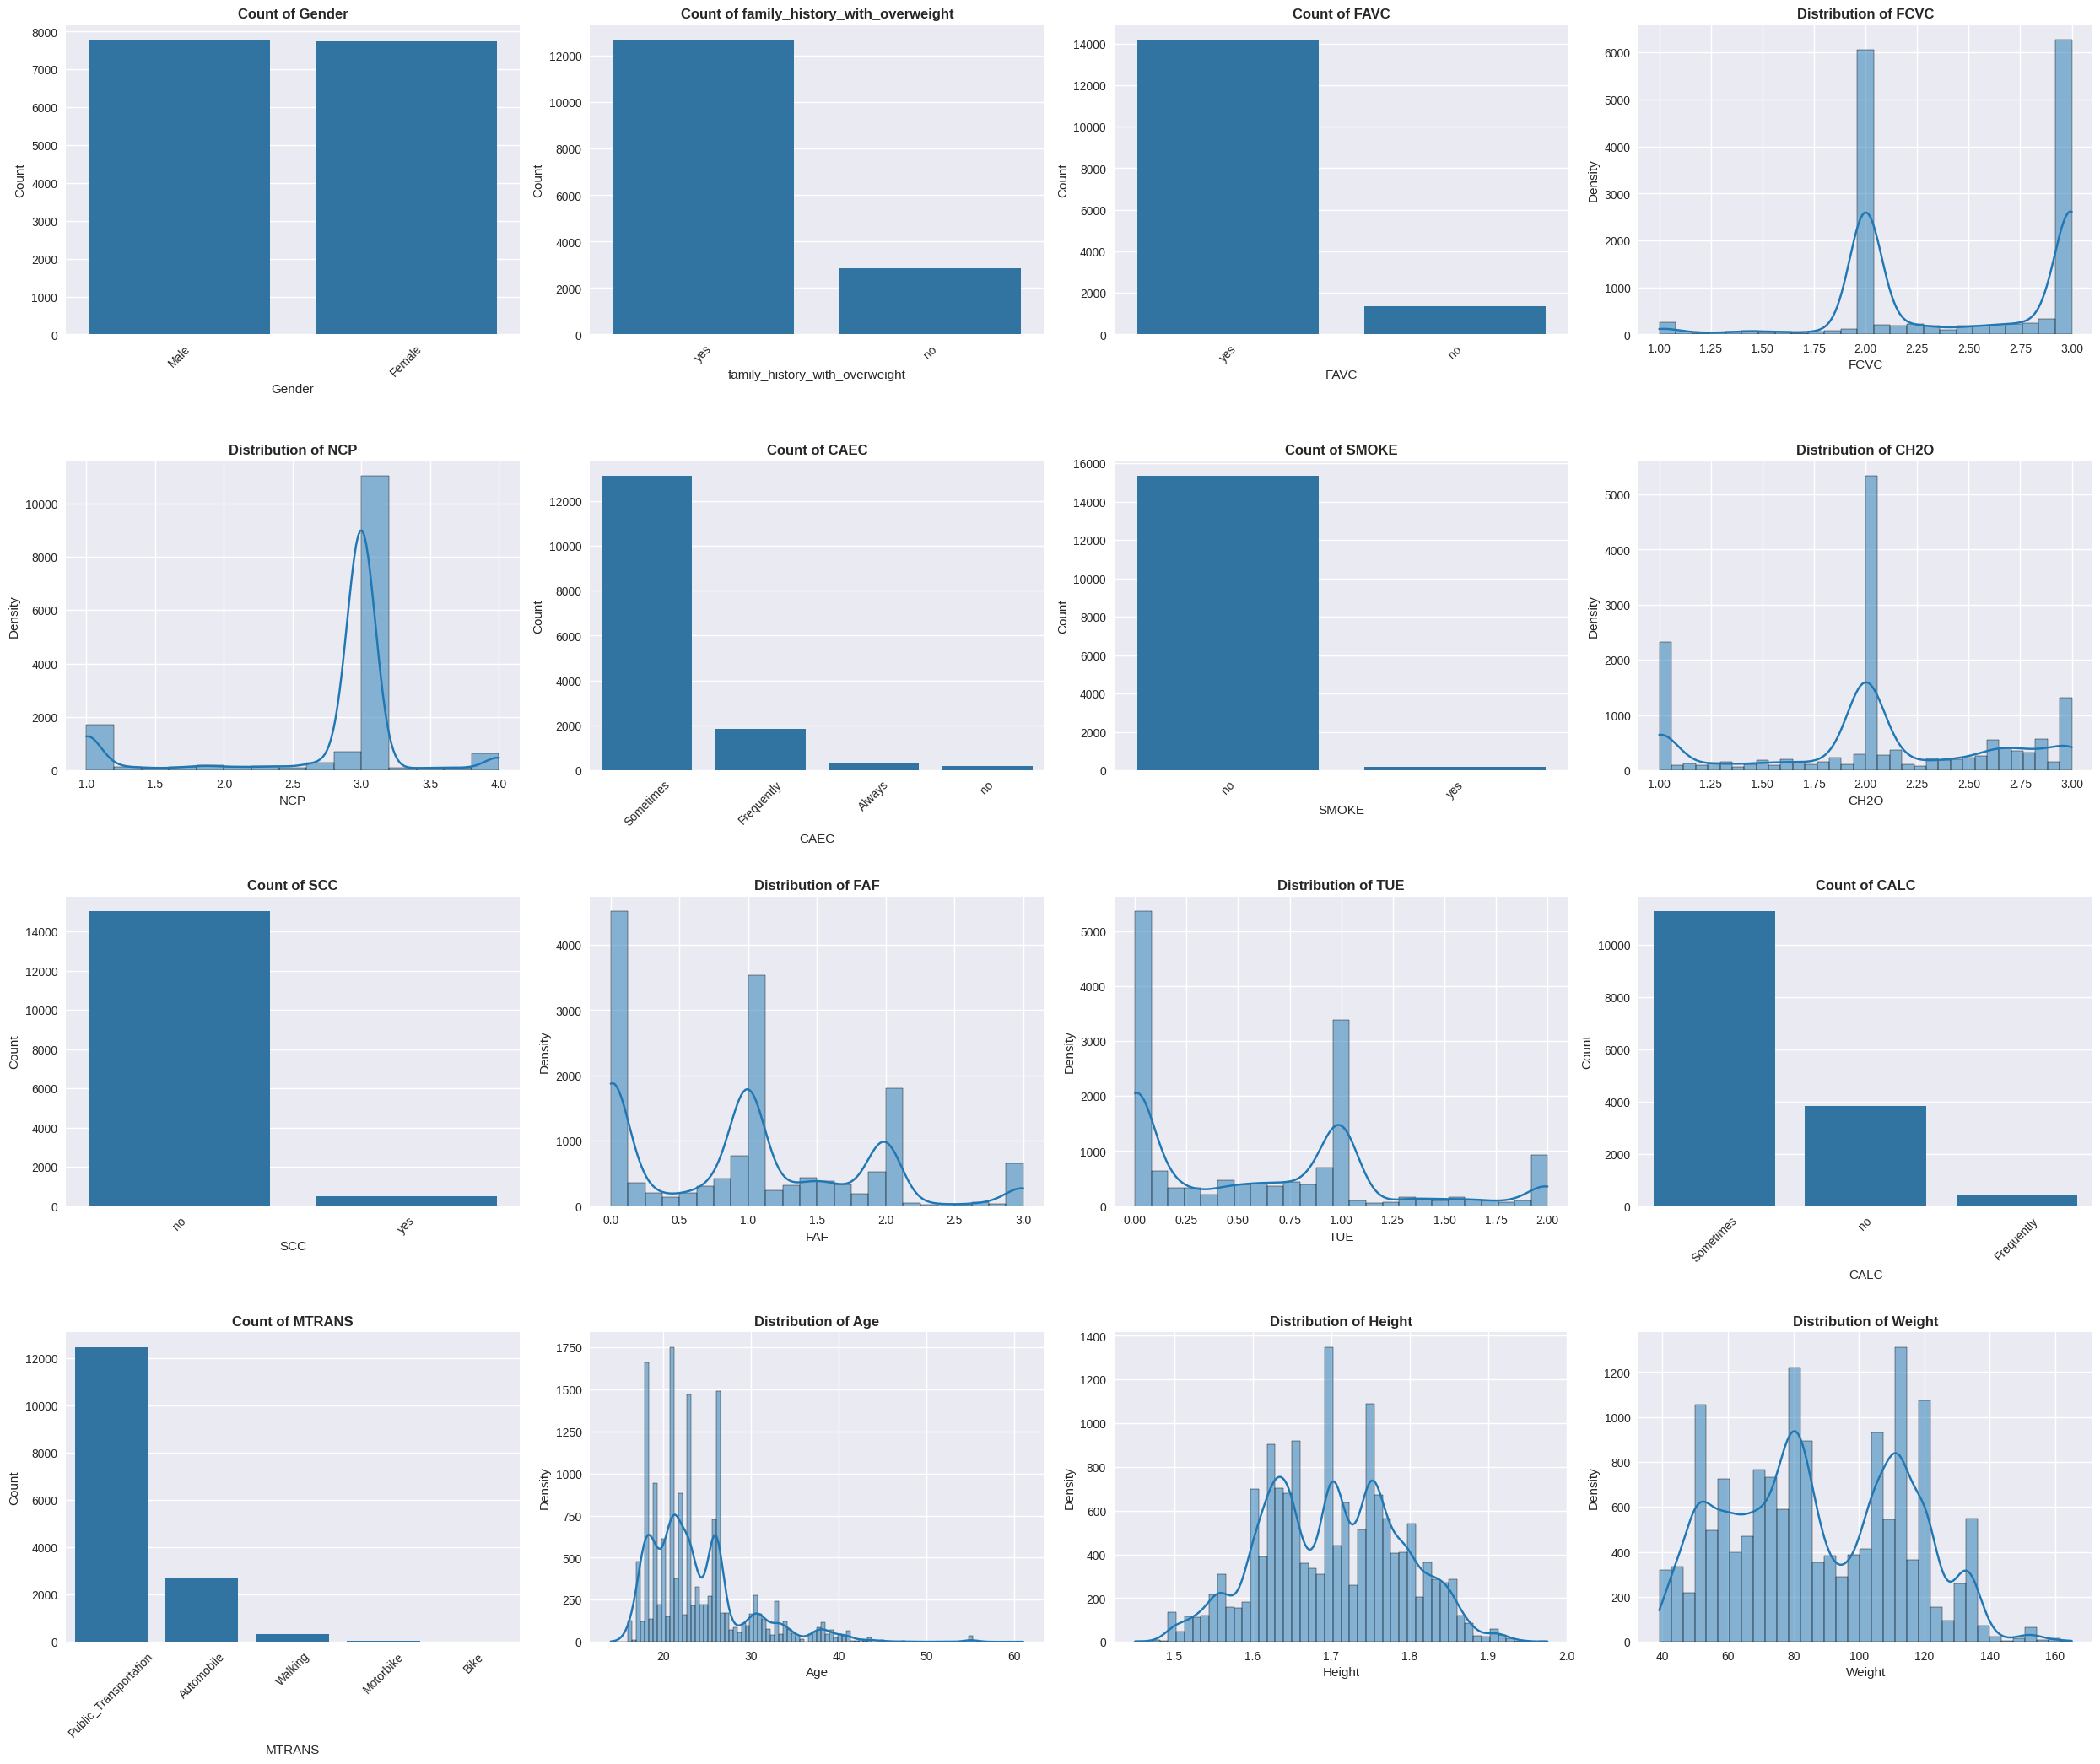

In [12]:
# Create subplots for all features
fig, axes = plt.subplots(6, 4, figsize=(25, 30))
axes = axes.ravel()

# List of features to plot
features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
    'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'Age', 'Height', 'Weight'
]

# Plot each feature
for i, feature in enumerate(features):
    ax = axes[i]

    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        # Categorical features - countplot
        if feature in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
            # For numerical features with few unique values, use histogram
            df[feature].hist(bins=20, ax=ax, alpha=0.7)
            ax.set_title(f'Distribution of {feature}', fontweight='bold')
            ax.set_xlabel(feature)
            ax.set_ylabel('Frequency')
        else:
            # For true categorical features
            sns.countplot(data=df, x=feature, ax=ax, order=df[feature].value_counts().index)
            ax.set_title(f'Count of {feature}', fontweight='bold')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
    else:
        # Numerical features - distribution plot
        sns.histplot(data=df, x=feature, ax=ax, kde=True)
        ax.set_title(f'Distribution of {feature}', fontweight='bold')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

# Remove empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [13]:
df_copy = df.copy()

In [14]:
for column in df_copy.columns:
    if(df_copy[column].dtype == 'O'):
        le = LabelEncoder()
        tot_list = list(df_copy[column].astype(str))
        le.fit(tot_list)
        df_copy[column] = le.transform(df_copy[column].astype(str))

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


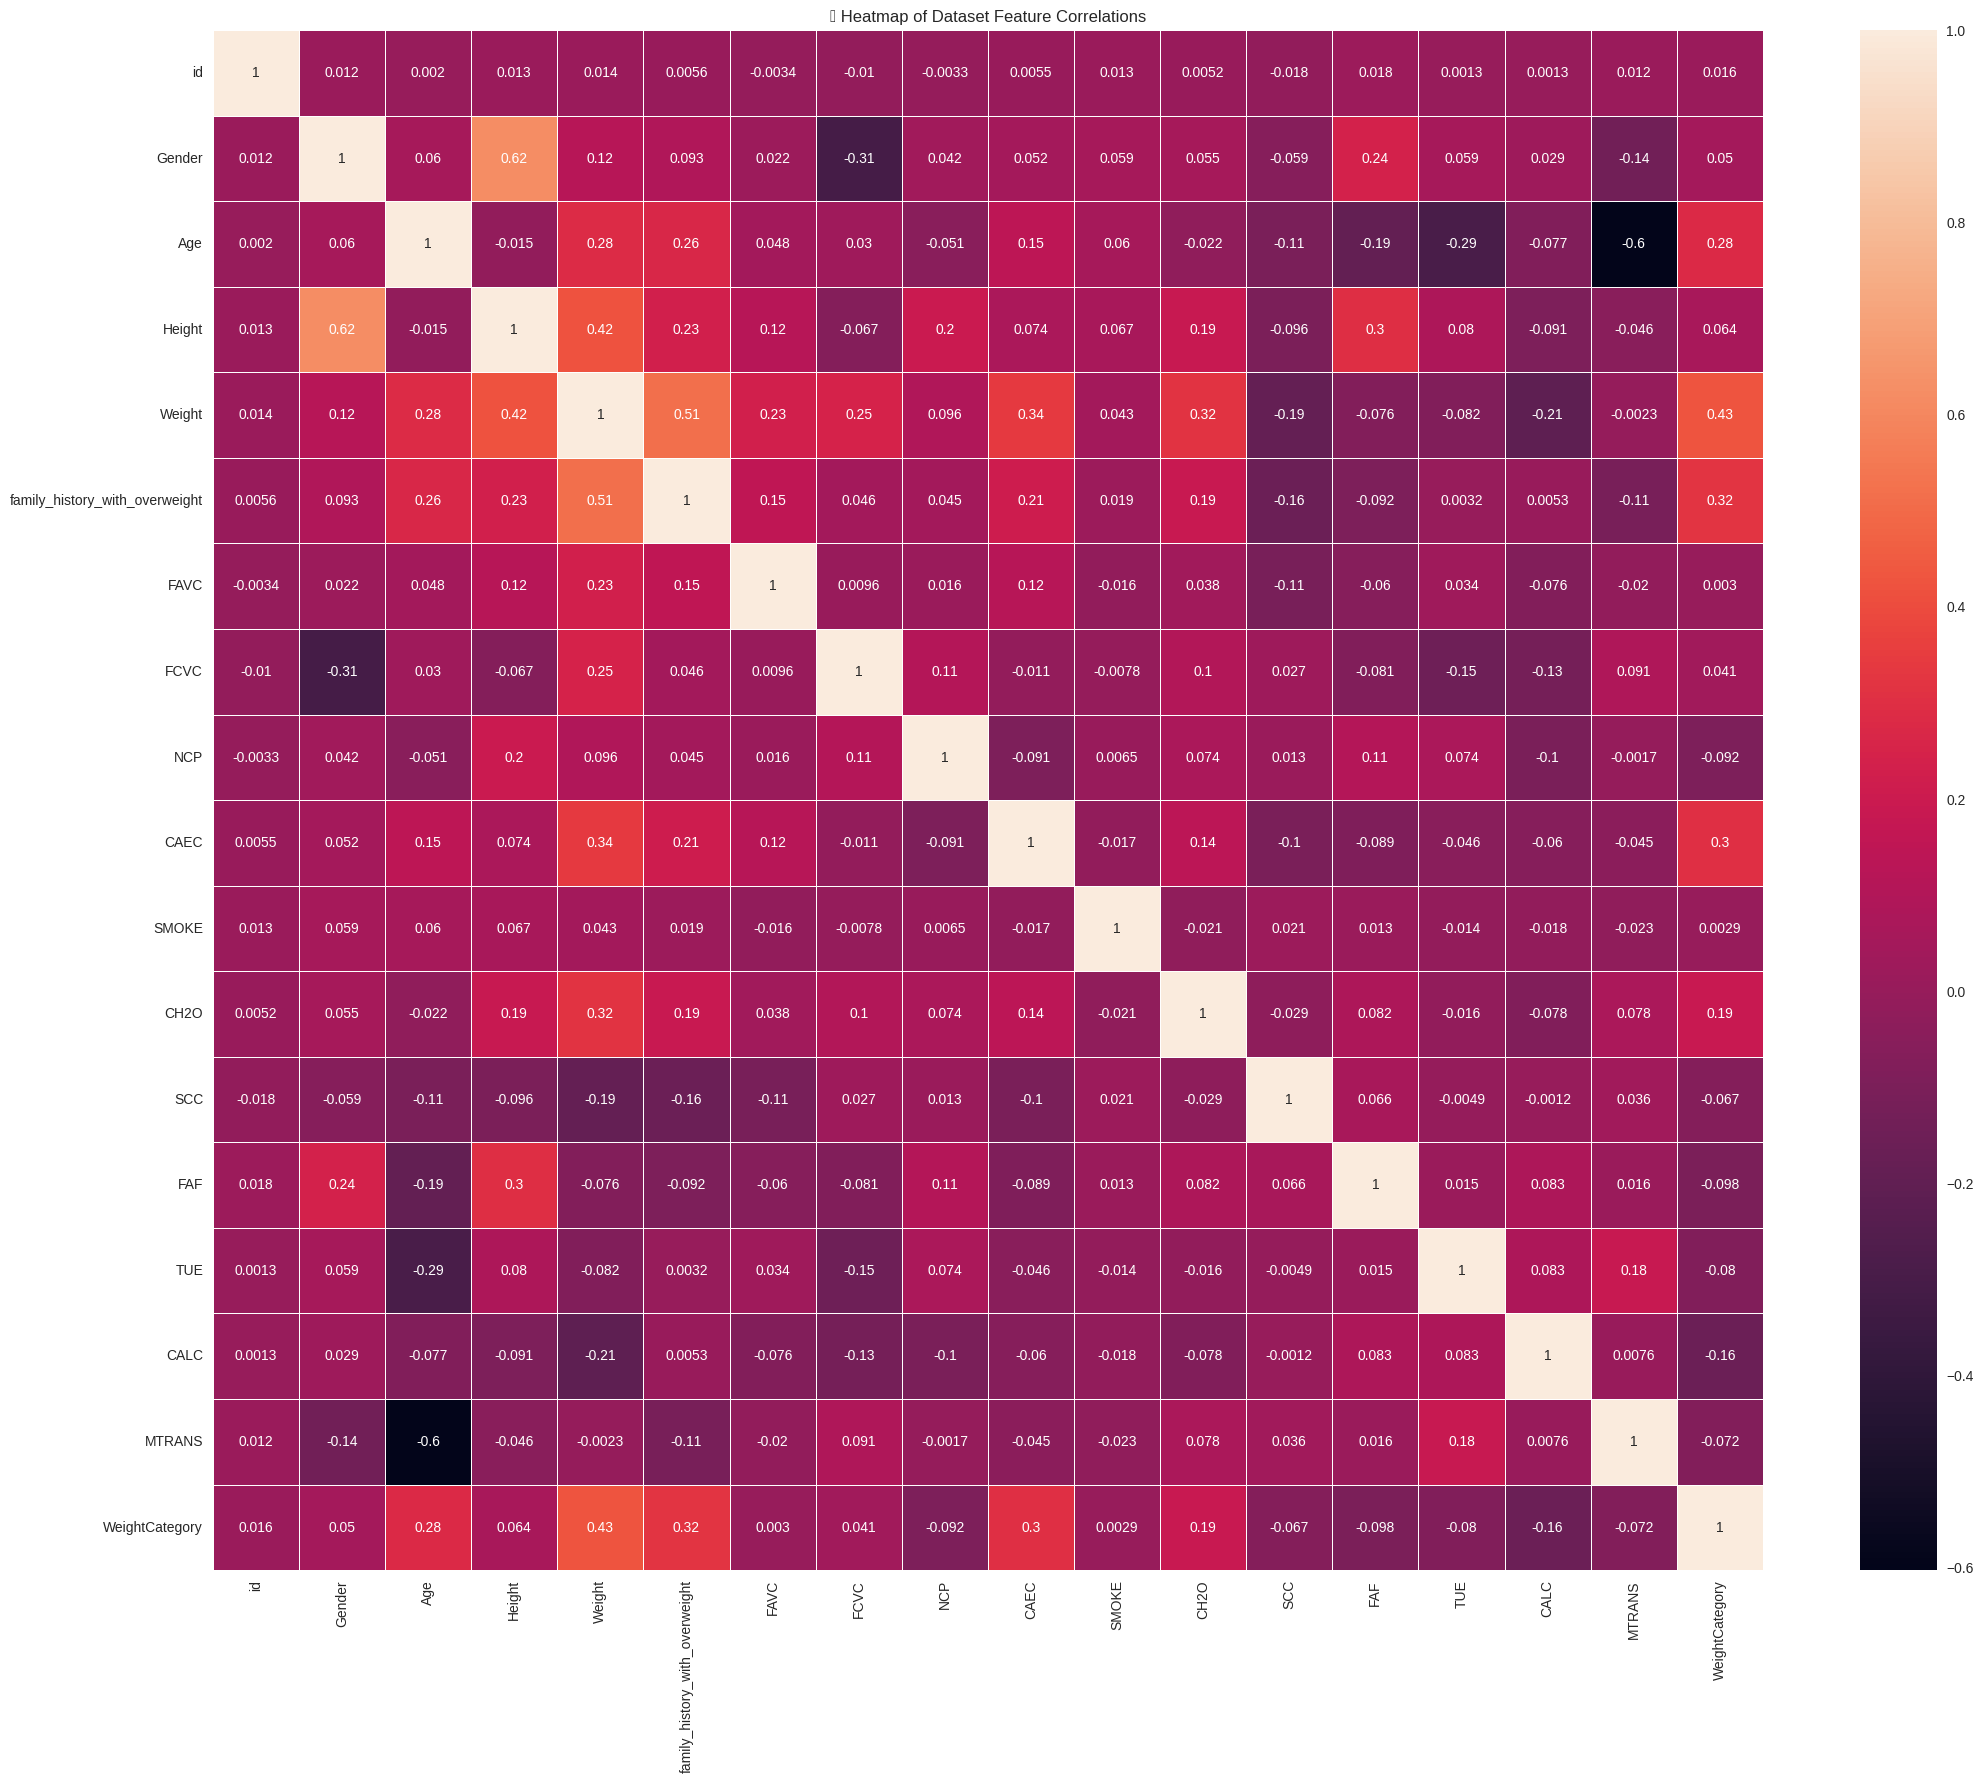

In [15]:
plt.figure(figsize=(25, 20))
sns.heatmap(df_copy.corr(), annot=True, linewidths=0.5)
plt.title('🔶 Heatmap of Dataset Feature Correlations')
plt.show()

### Test Data Observations

In [16]:
# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")

Test Dataset Shape: (5225, 17)

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225 entries, 0 to 5224
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5225 non-null   int64  
 1   Gender                          5225 non-null   object 
 2   Age                             5225 non-null   float64
 3   Height                          5225 non-null   float64
 4   Weight                          5225 non-null   float64
 5   family_history_with_overweight  5225 non-null   object 
 6   FAVC                            5225 non-null   object 
 7   FCVC                            5225 non-null   float64
 8   NCP                             5225 non-null   float64
 9   CAEC                            5225 non-null   object 
 10  SMOKE                           5225 non-null   object 
 11  CH2O                            5225 non-nul

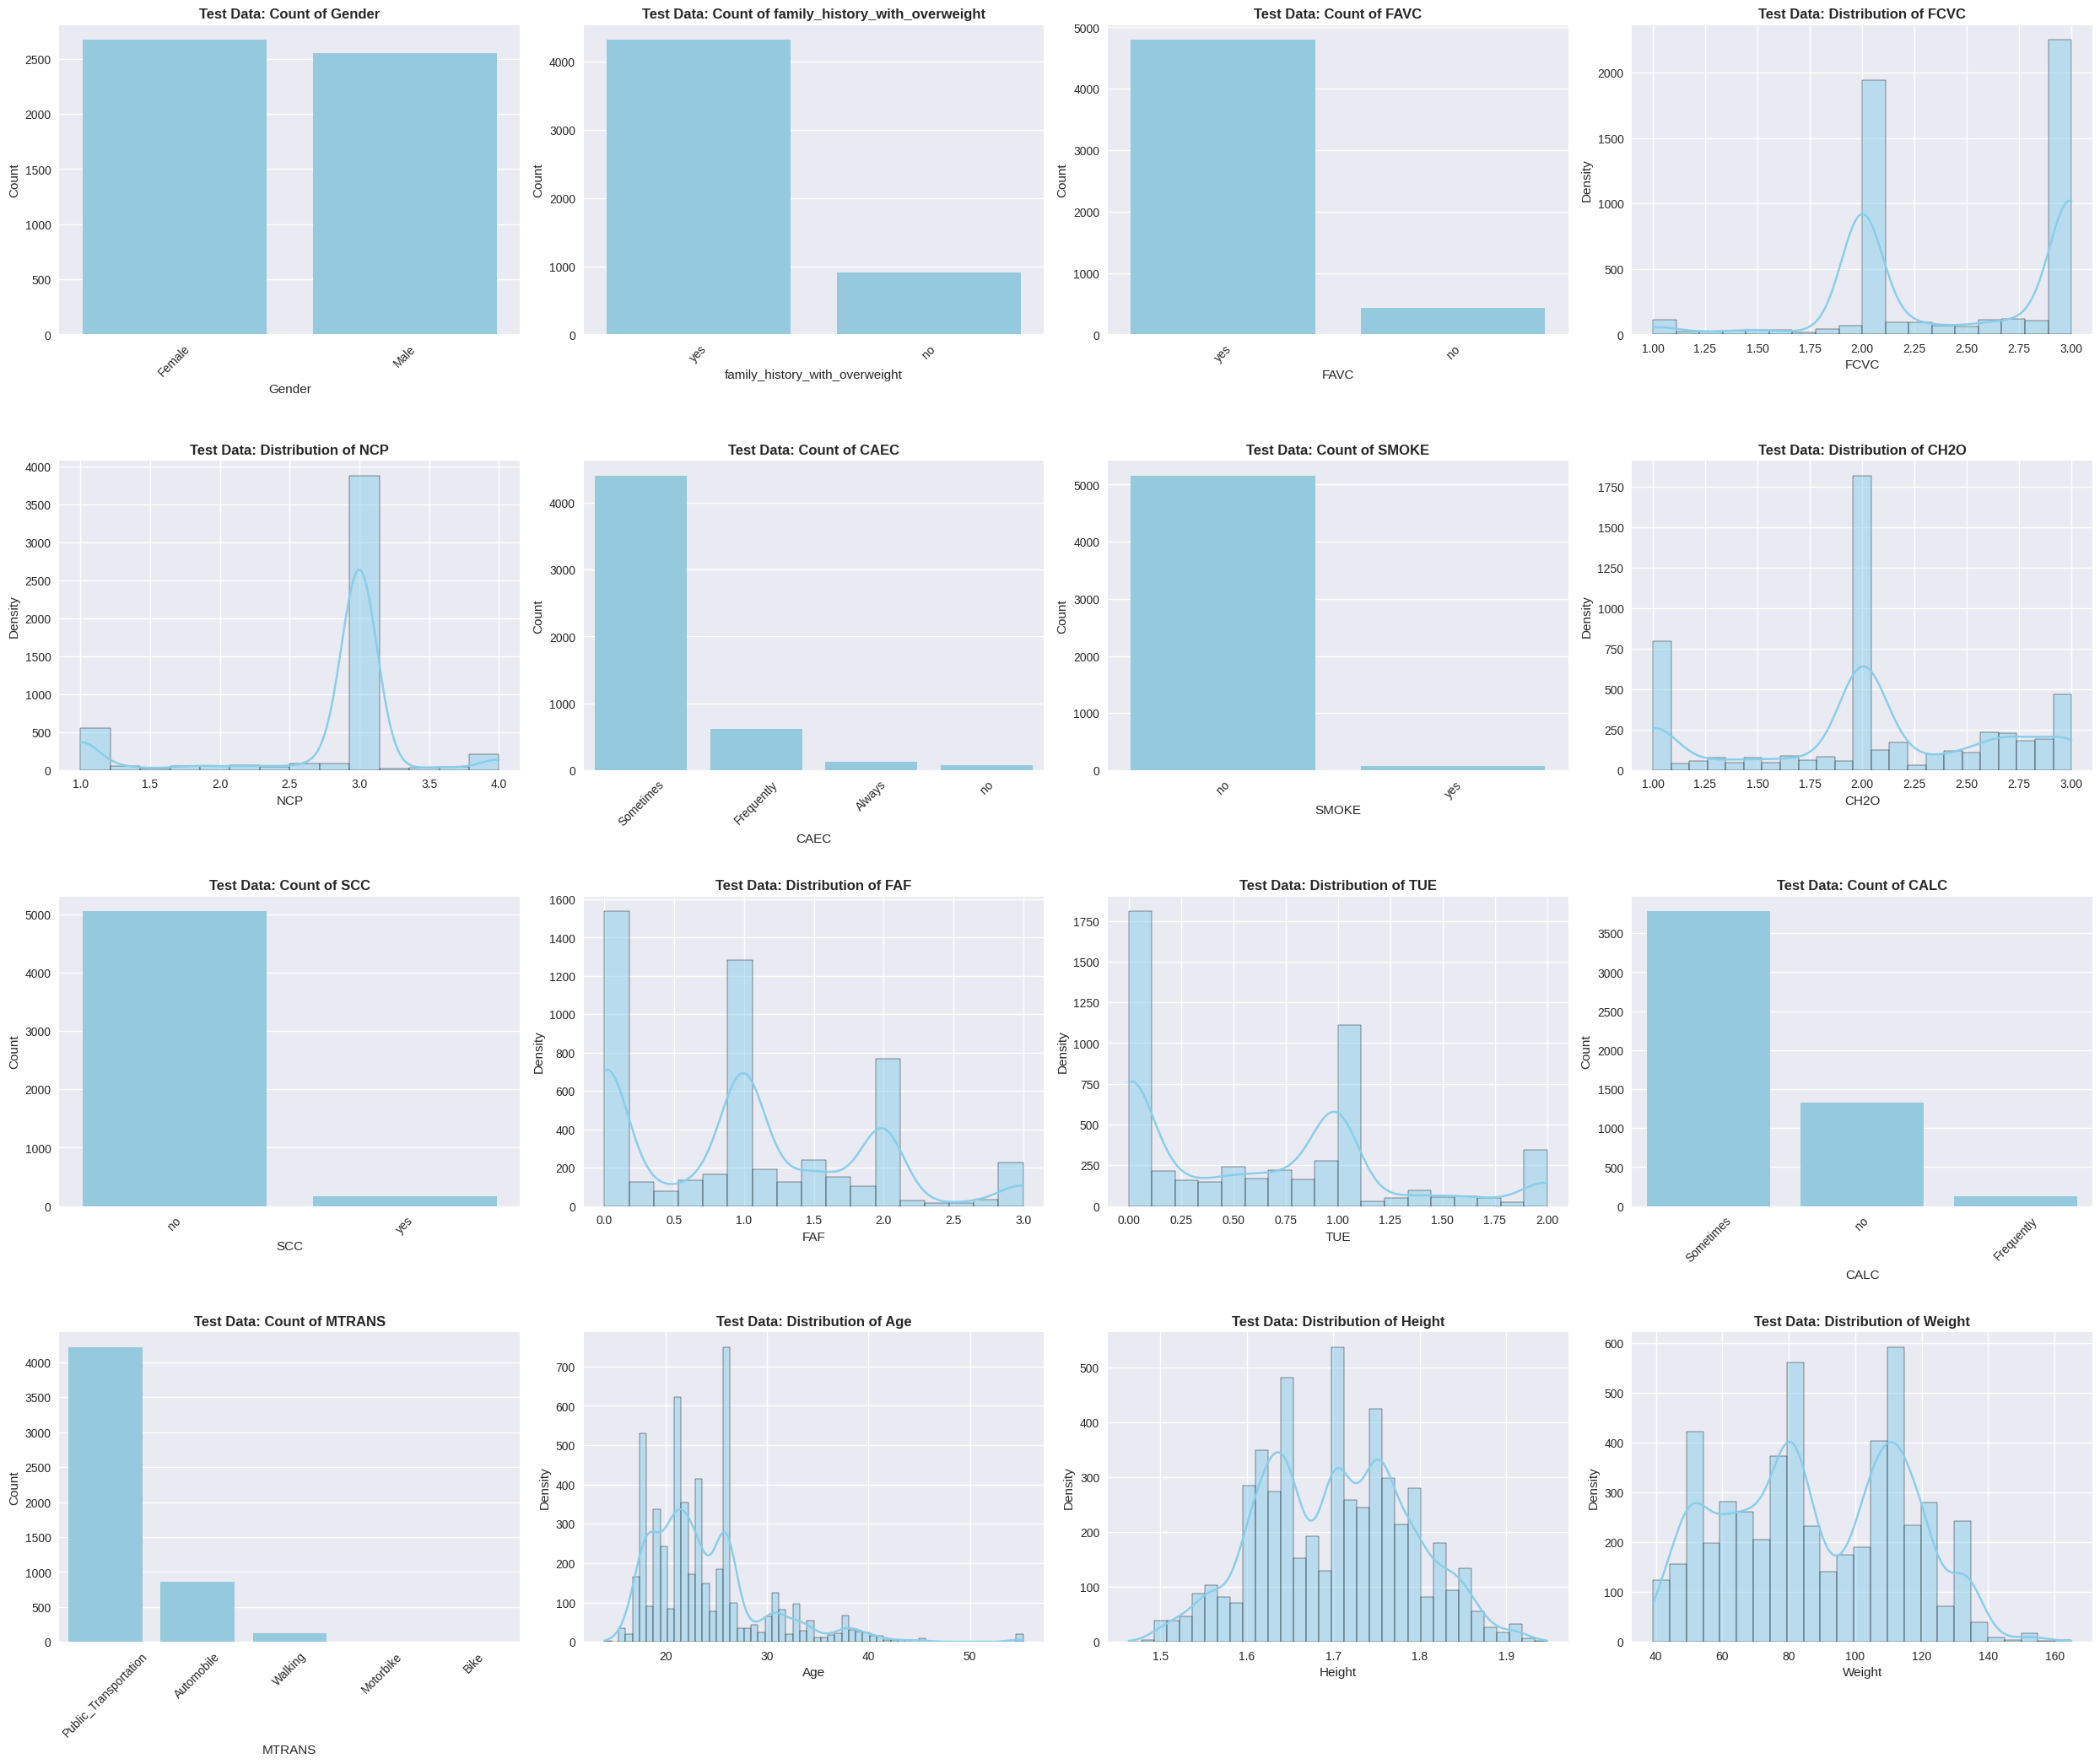


Test Data - Summary Statistics for Numerical Features:
               Age       Height       Weight         FCVC         NCP  \
count  5225.000000  5225.000000  5225.000000  5225.000000  5225.00000   
mean     23.917600     1.701216    88.192612     2.454802     2.76403   
std       5.761355     0.086240    26.410210     0.540020     0.70219   
min      14.000000     1.463167    39.101805     1.000000     1.00000   
25%      20.000000     1.632983    66.500000     2.000000     3.00000   
50%      22.875223     1.700000    85.000000     2.499388     3.00000   
75%      26.000000     1.761519   111.720238     3.000000     3.00000   
max      55.246250     1.947406   165.057269     3.000000     4.00000   

              CH2O          FAF          TUE  
count  5225.000000  5225.000000  5225.000000  
mean      2.034746     0.995953     0.625505  
std       0.610672     0.842551     0.601761  
min       1.000000     0.000000     0.000000  
25%       1.785804     0.015860     0.000000  
50% 

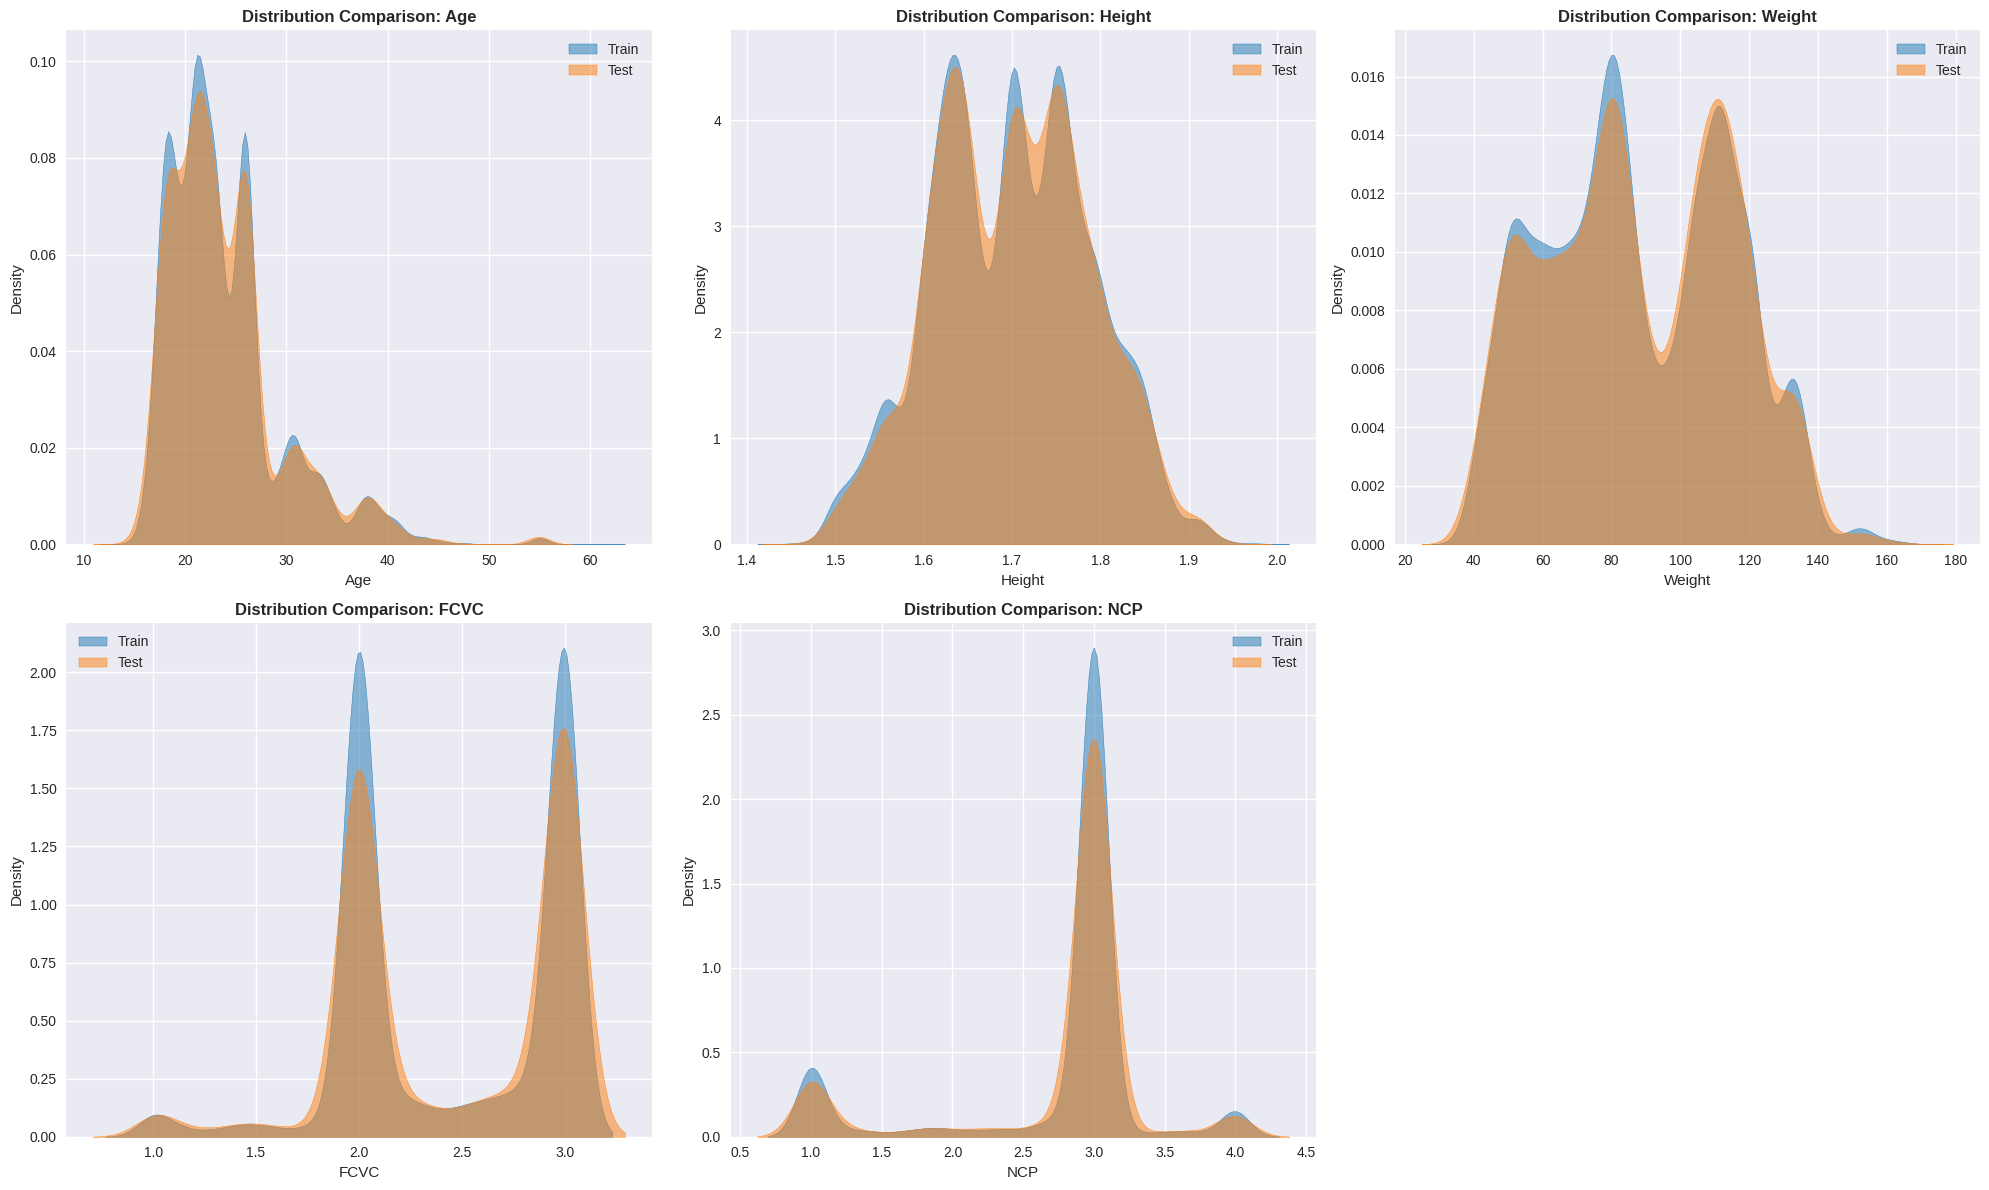

In [17]:
# Load test data
df_test = pd.read_csv('dataset/test.csv')

print("Test Dataset Shape:", df_test.shape)
print("\nTest Dataset Info:")
print(df_test.info())

# Create subplots for all features in test data
fig, axes = plt.subplots(6, 4, figsize=(25, 30))
axes = axes.ravel()

# List of features to plot (excluding WeightCategory)
features = [
    'Gender', 'family_history_with_overweight', 'FAVC', 'FCVC',
    'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
    'CALC', 'MTRANS', 'Age', 'Height', 'Weight'
]

# Plot each feature in test data
for i, feature in enumerate(features):
    ax = axes[i]

    if df_test[feature].dtype == 'object' or df_test[feature].nunique() < 10:
        # Categorical features - countplot
        if feature in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
            # For numerical features with few unique values, use histogram
            df_test[feature].hist(bins=20, ax=ax, alpha=0.7, color='skyblue')
            ax.set_title(f'Test Data: Distribution of {feature}', fontweight='bold')
            ax.set_xlabel(feature)
            ax.set_ylabel('Frequency')
        else:
            # For true categorical features
            sns.countplot(data=df_test, x=feature, ax=ax, order=df_test[feature].value_counts().index, color='skyblue')
            ax.set_title(f'Test Data: Count of {feature}', fontweight='bold')
            ax.set_xlabel(feature)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
    else:
        # Numerical features - distribution plot
        sns.histplot(data=df_test, x=feature, ax=ax, kde=True, color='skyblue')
        ax.set_title(f'Test Data: Distribution of {feature}', fontweight='bold')
        ax.set_xlabel(feature)
        ax.set_ylabel('Density')

# Remove empty subplots
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


# Select numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


print("\nTest Data - Summary Statistics for Categorical Features:")
categorical_features = [f for f in features if f not in numerical_features]
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df_test[feature].value_counts())

# Comparison with training data (if available)
try:
    df_train = pd.read_csv('dataset/train.csv')

    print("\n" + "="*50)
    print("COMPARISON BETWEEN TRAIN AND TEST DATASETS")
    print("="*50)

    # Compare basic statistics
    print("\nShape Comparison:")
    print(f"Train data: {df_train.shape}")
    print(f"Test data:  {df_test.shape}")

    # Compare numerical feature distributions
    print("\nNumerical Features - Mean Comparison:")
    train_means = df_train[numerical_features].mean()
    test_means = df_test[numerical_features].mean()
    comparison_df = pd.DataFrame({
        'Train_Mean': train_means,
        'Test_Mean': test_means,
        'Difference': train_means - test_means
    })
    print(comparison_df)

    # Compare categorical distributions
    print("\nCategorical Features Distribution Comparison:")
    for feature in categorical_features:
        print(f"\n{feature}:")
        train_dist = df_train[feature].value_counts(normalize=True).sort_index()
        test_dist = df_test[feature].value_counts(normalize=True).sort_index()
        comparison = pd.DataFrame({
            'Train': train_dist,
            'Test': test_dist,
            'Diff': train_dist - test_dist
        })
        print(comparison)

except FileNotFoundError:
    print("\nTraining data (train.csv) not found for comparison")
except Exception as e:
    print(f"\nCould not compare with training data: {e}")

# Feature distributions comparison plot (if train data available)
try:
    if 'df_train' in locals():
        # Plot comparison for key numerical features
        comp_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP']

        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        axes = axes.ravel()

        for i, feature in enumerate(comp_features):
            ax = axes[i]
            # Plot both distributions
            sns.kdeplot(data=df_train, x=feature, label='Train', ax=ax, fill=True, alpha=0.5)
            sns.kdeplot(data=df_test, x=feature, label='Test', ax=ax, fill=True, alpha=0.5)
            ax.set_title(f'Distribution Comparison: {feature}', fontweight='bold')
            ax.set_xlabel(feature)
            ax.set_ylabel('Density')
            ax.legend()

        # Remove empty subplots
        for i in range(len(comp_features), len(axes)):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"Could not create comparison plots: {e}")

In [18]:
f_test_copy = f_test.copy()

In [19]:
for column in f_test_copy.columns:
    if(f_test_copy[column].dtype == 'O'):
        le = LabelEncoder()
        tot_list = list(f_test_copy[column].astype(str)) # + list(X_test[column].astype(str))
        le.fit(tot_list)
        f_test_copy[column] = le.transform(f_test_copy[column].astype(str))
        # X_test[column] = le.transform(X_test[column].astype(str))

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128310 (\N{LARGE ORANGE DIAMOND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


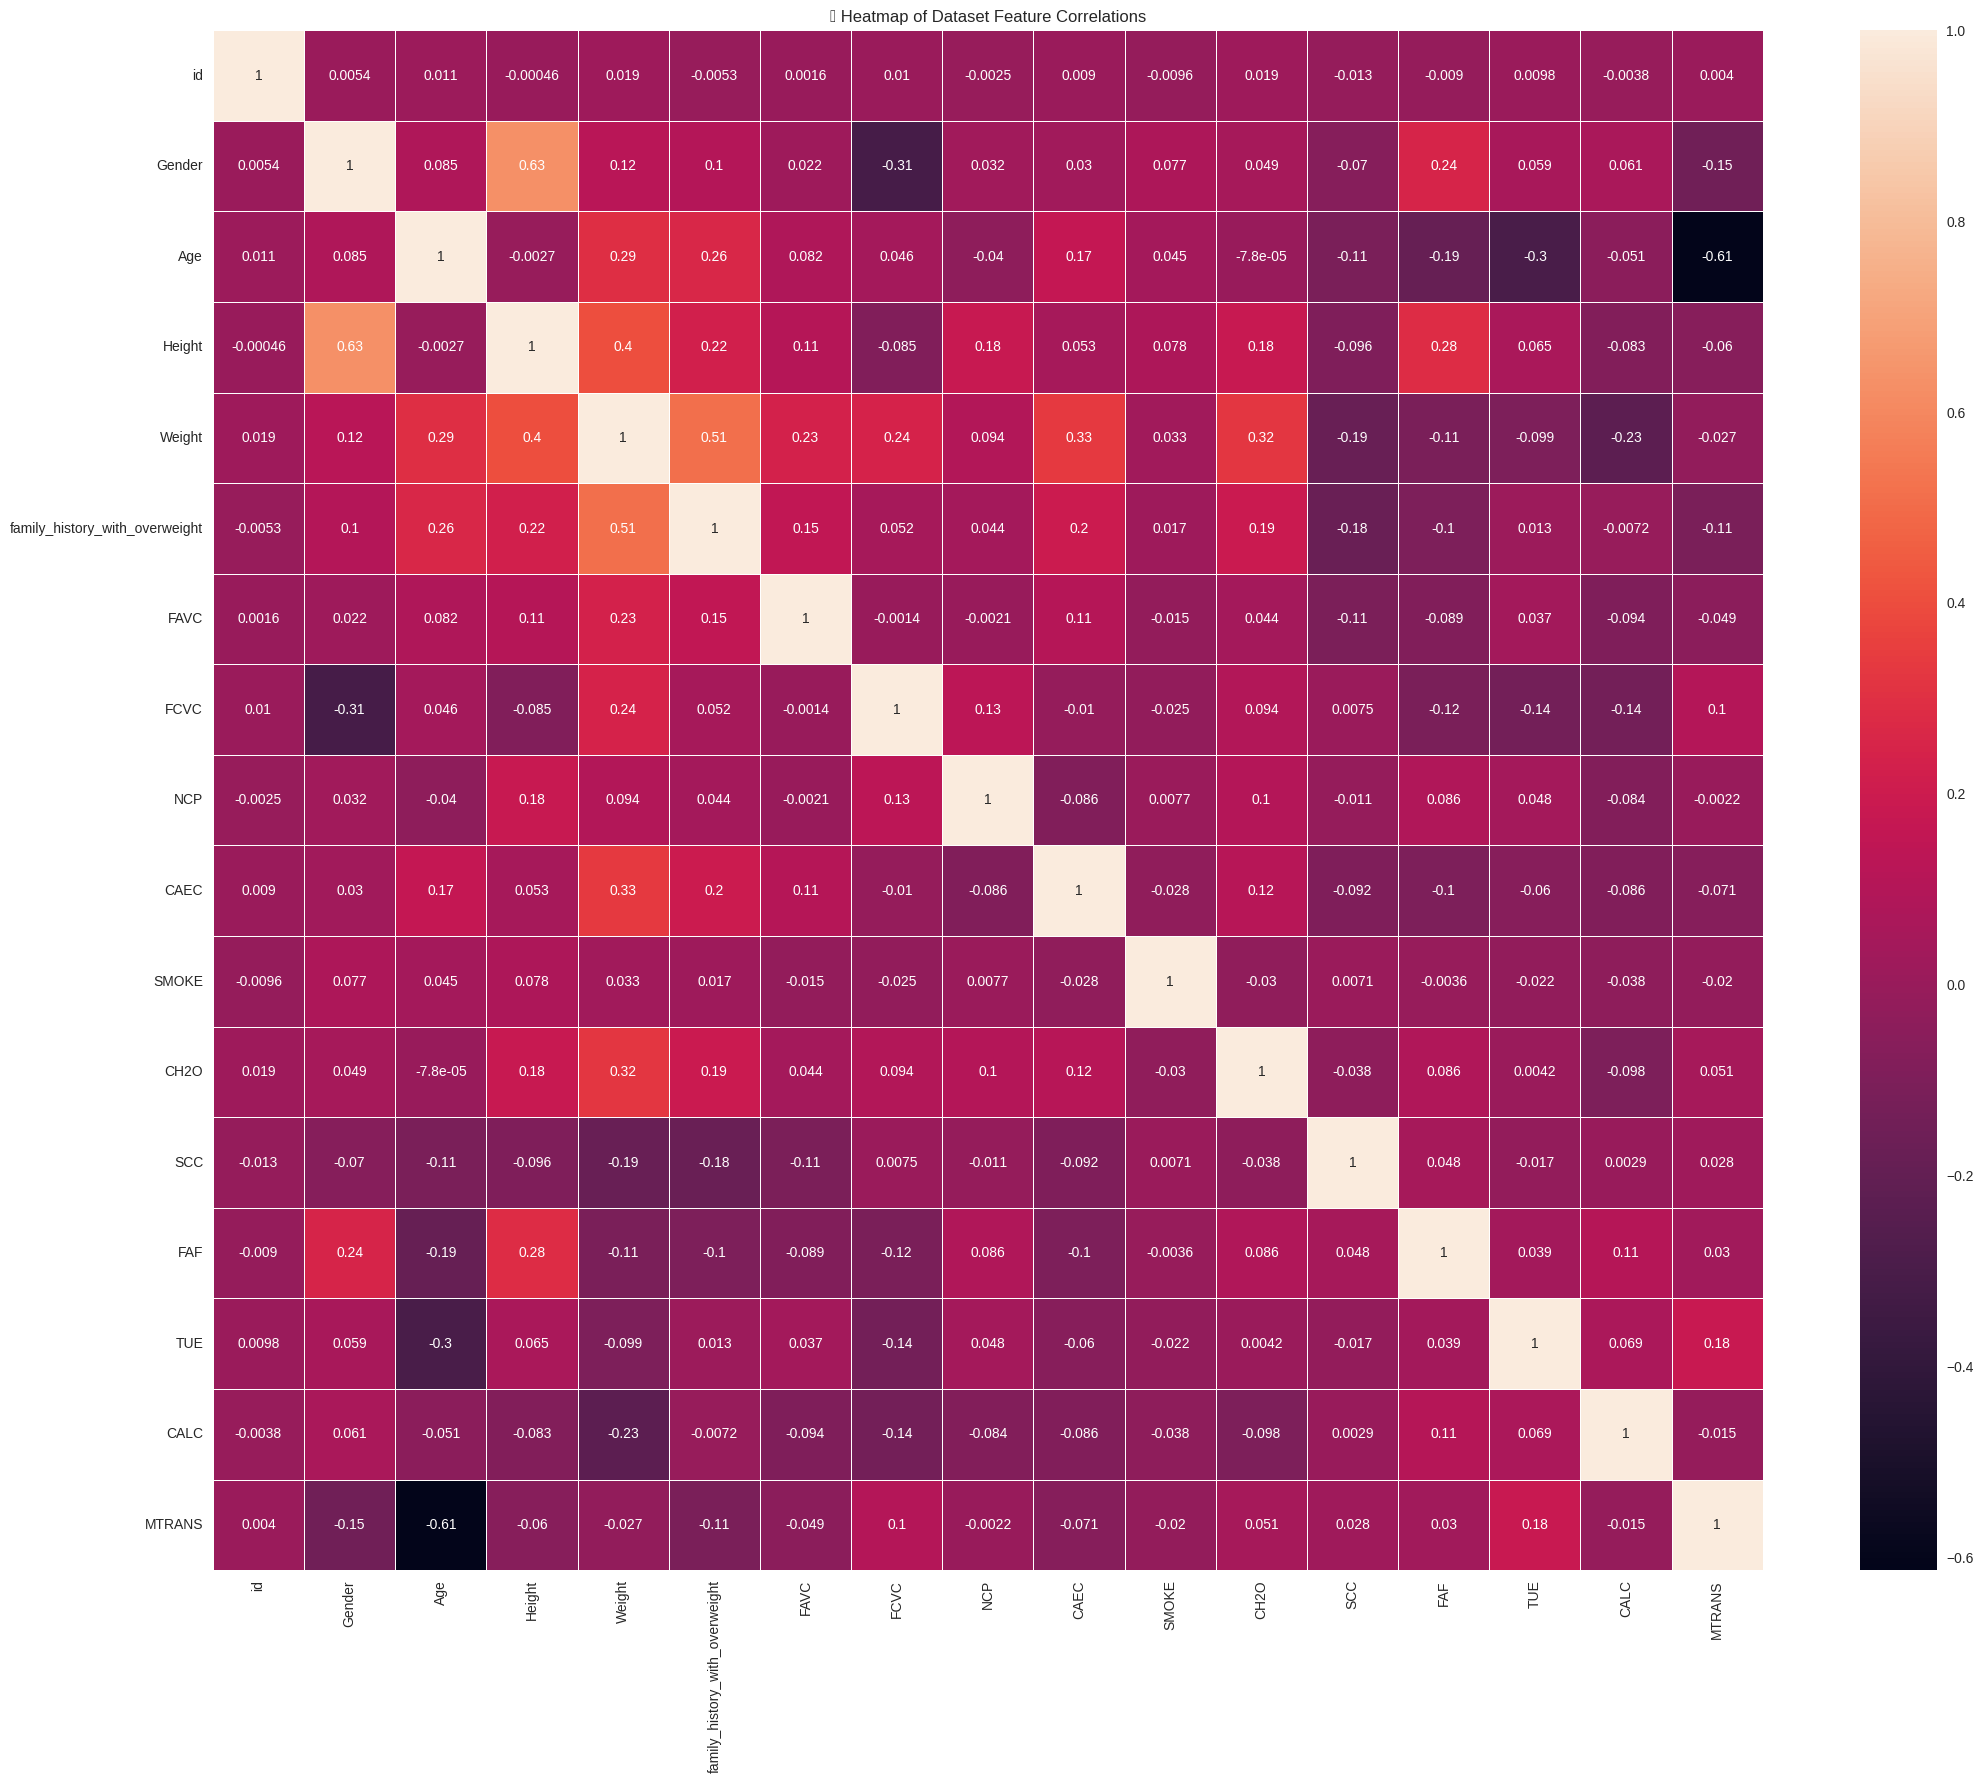

In [20]:
plt.figure(figsize=(25, 20))
sns.heatmap(f_test_copy.corr(), annot=True, linewidths=0.5)
plt.title('🔶 Heatmap of Dataset Feature Correlations')
plt.show()

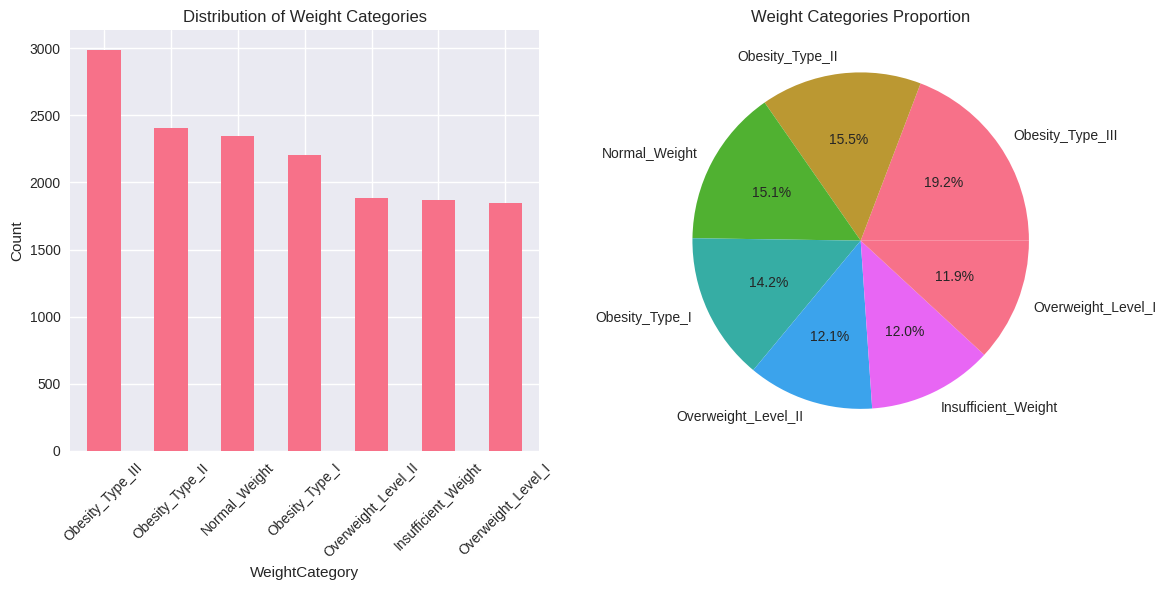

Weight Category Distribution:
WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64


In [22]:
# Distribution of the Target Variable (WeightCategory)
plt.figure(figsize=(12, 6))
weight_category_counts = df['WeightCategory'].value_counts()
plt.subplot(1, 2, 1)
weight_category_counts.plot(kind='bar')
plt.title('Distribution of Weight Categories')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(weight_category_counts.values, labels=weight_category_counts.index, autopct='%1.1f%%')
plt.title('Weight Categories Proportion')
plt.tight_layout()
plt.show()

print("Weight Category Distribution:")
print(weight_category_counts)

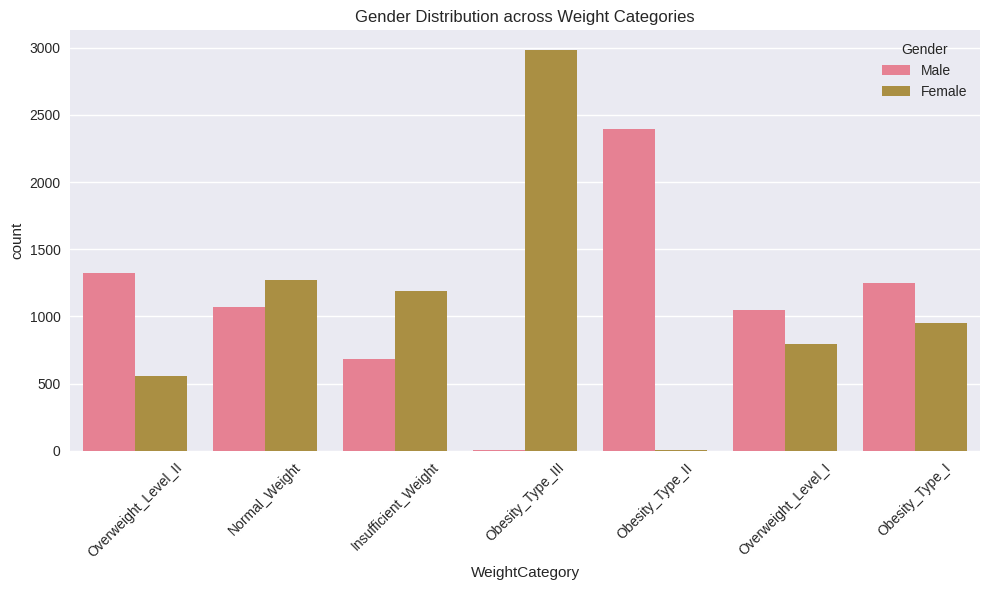

In [23]:
# Gender Distribution across Weight Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WeightCategory', hue='Gender')
plt.title('Gender Distribution across Weight Categories')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

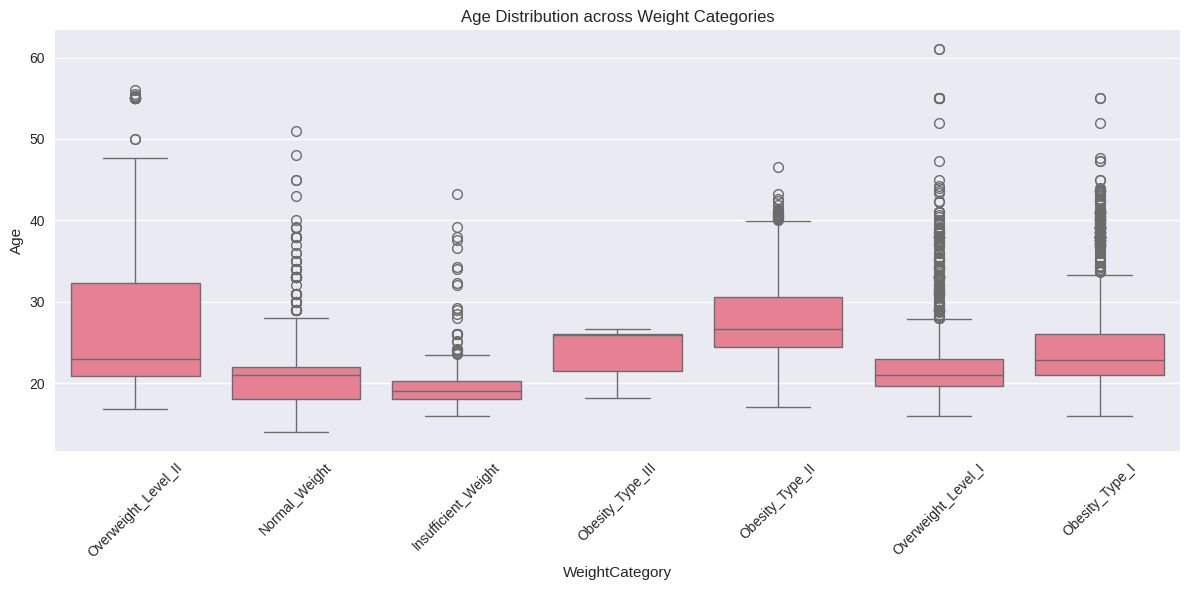

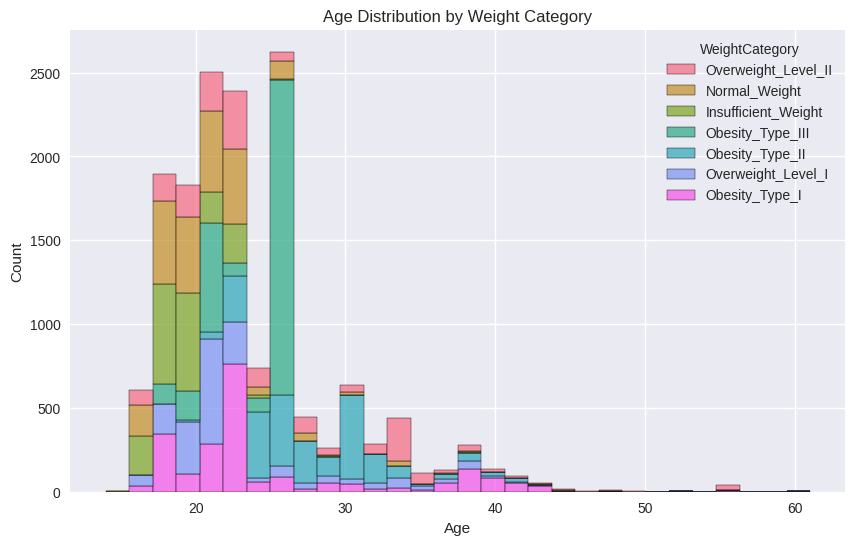

In [24]:
# Age Distribution by Weight Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='WeightCategory', y='Age')
plt.title('Age Distribution across Weight Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Age distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='WeightCategory', multiple='stack', bins=30)
plt.title('Age Distribution by Weight Category')
plt.show()

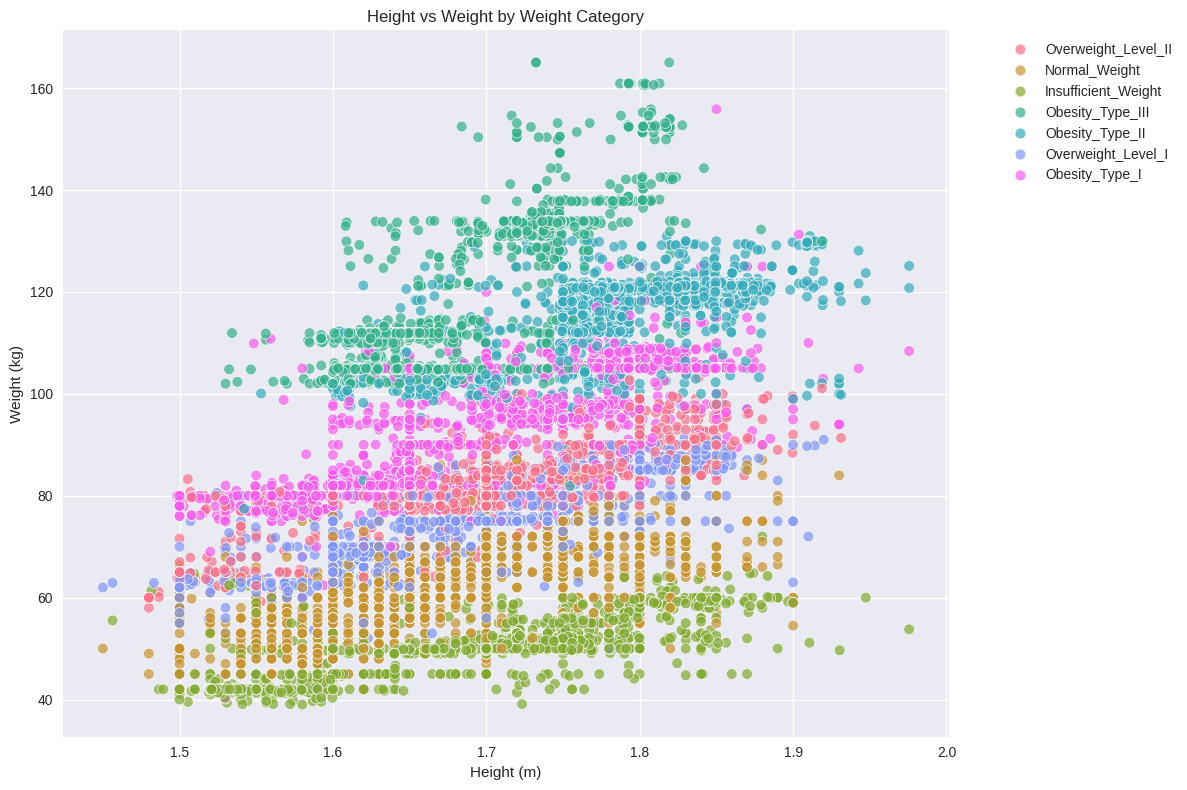

In [25]:
# Height vs Weight colored by Weight Category
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Height', y='Weight', hue='WeightCategory', alpha=0.7, s=60)
plt.title('Height vs Weight by Weight Category')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

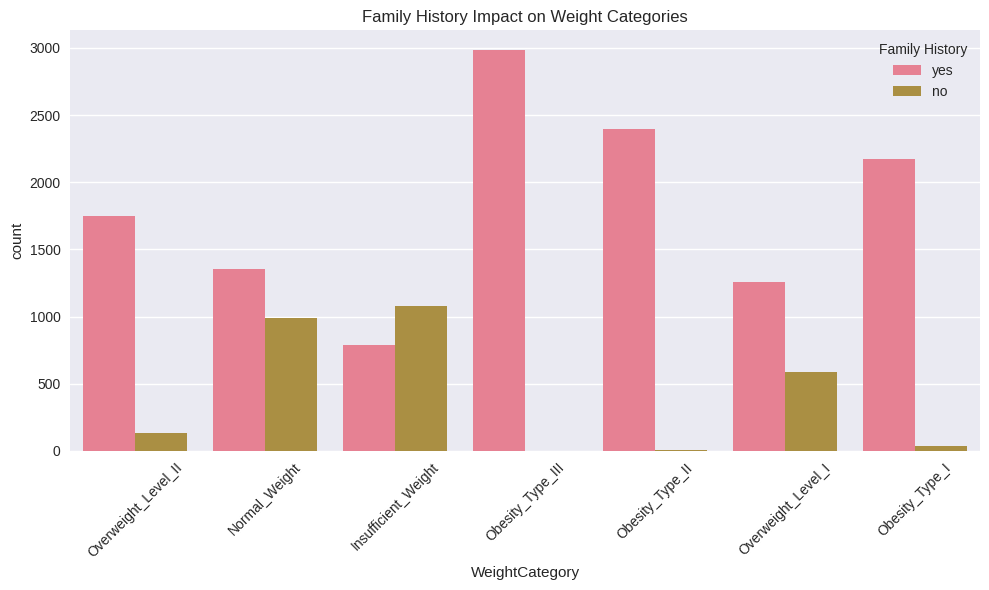


Family History Impact (%):
family_history_with_overweight         no        yes
WeightCategory                                      
Insufficient_Weight             57.807487  42.192513
Normal_Weight                   42.302772  57.697228
Obesity_Type_I                   1.540553  98.459447
Obesity_Type_II                  0.208073  99.791927
Obesity_Type_III                 0.033523  99.966477
Overweight_Level_I              31.941432  68.058568
Overweight_Level_II              7.177033  92.822967


In [26]:
# Family History Impact
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WeightCategory', hue='family_history_with_overweight')
plt.title('Family History Impact on Weight Categories')
plt.xticks(rotation=45)
plt.legend(title='Family History')
plt.tight_layout()
plt.show()

# Calculate percentages
family_history_impact = pd.crosstab(df['WeightCategory'], df['family_history_with_overweight'], normalize='index') * 100
print("\nFamily History Impact (%):")
print(family_history_impact)

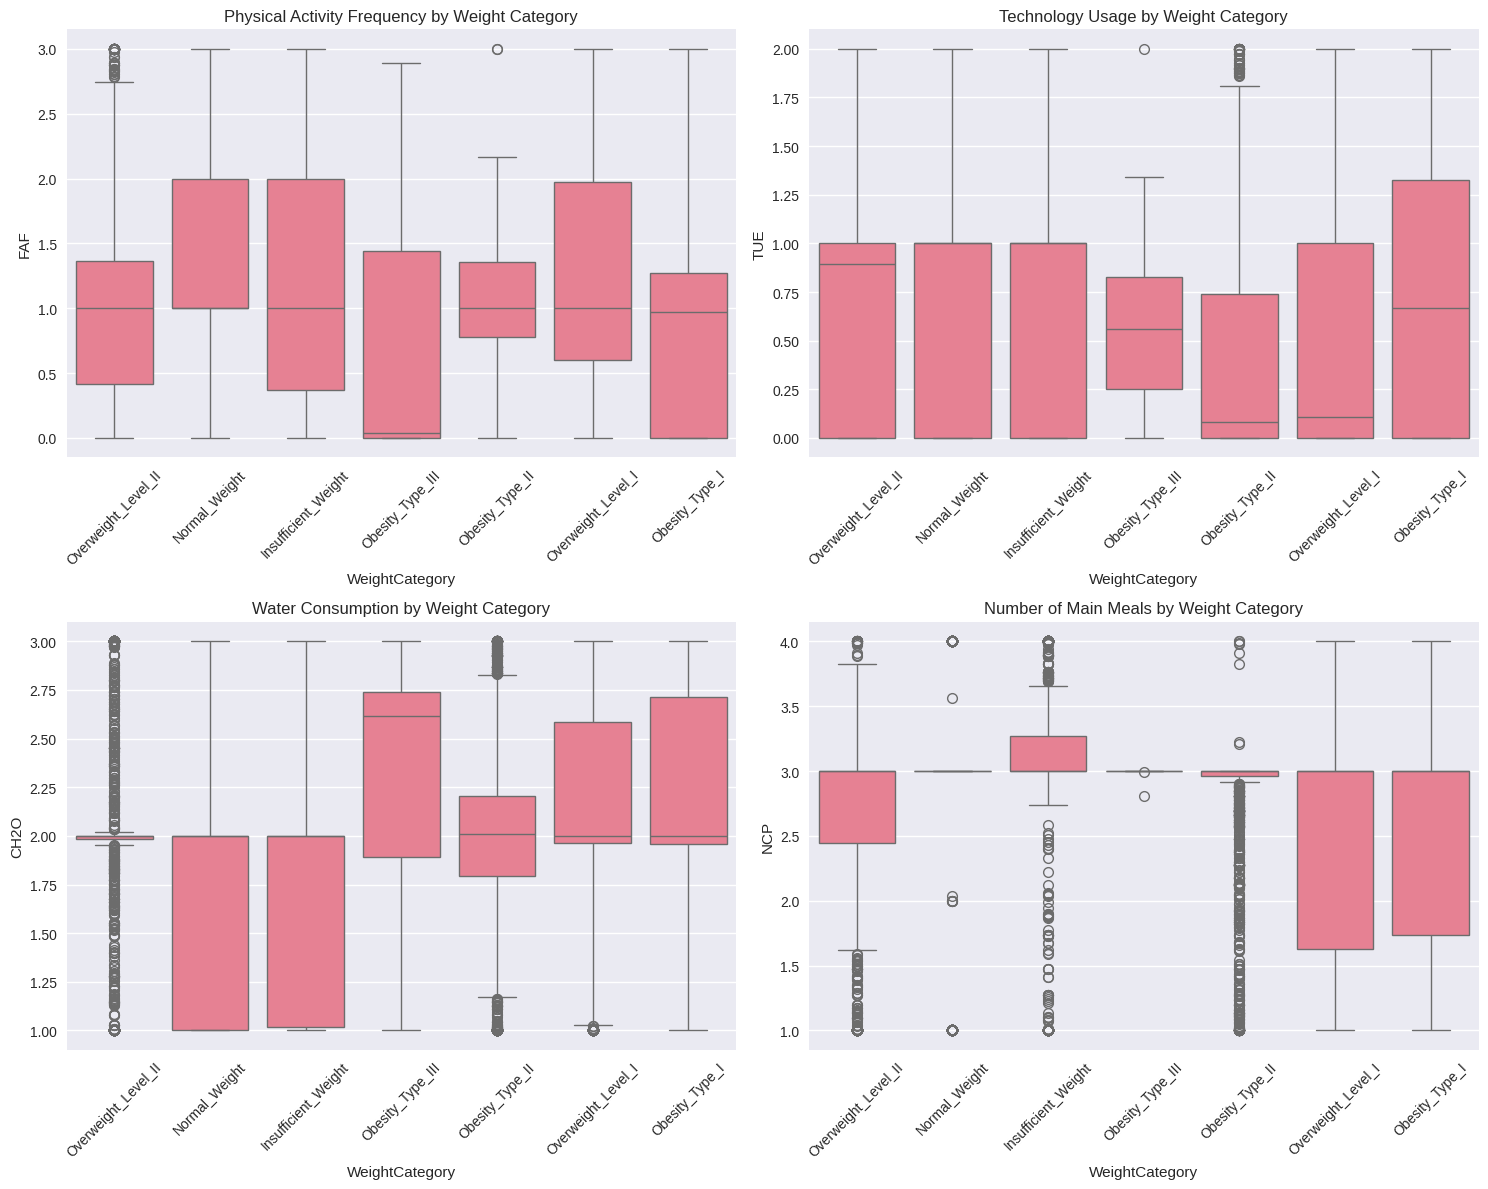

In [27]:
# Physical Activity Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Frequency of physical activity
sns.boxplot(data=df, x='WeightCategory', y='FAF', ax=axes[0,0])
axes[0,0].set_title('Physical Activity Frequency by Weight Category')
axes[0,0].tick_params(axis='x', rotation=45)

# Time using technology devices
sns.boxplot(data=df, x='WeightCategory', y='TUE', ax=axes[0,1])
axes[0,1].set_title('Technology Usage by Weight Category')
axes[0,1].tick_params(axis='x', rotation=45)

# Water consumption
sns.boxplot(data=df, x='WeightCategory', y='CH2O', ax=axes[1,0])
axes[1,0].set_title('Water Consumption by Weight Category')
axes[1,0].tick_params(axis='x', rotation=45)

# Number of main meals
sns.boxplot(data=df, x='WeightCategory', y='NCP', ax=axes[1,1])
axes[1,1].set_title('Number of Main Meals by Weight Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

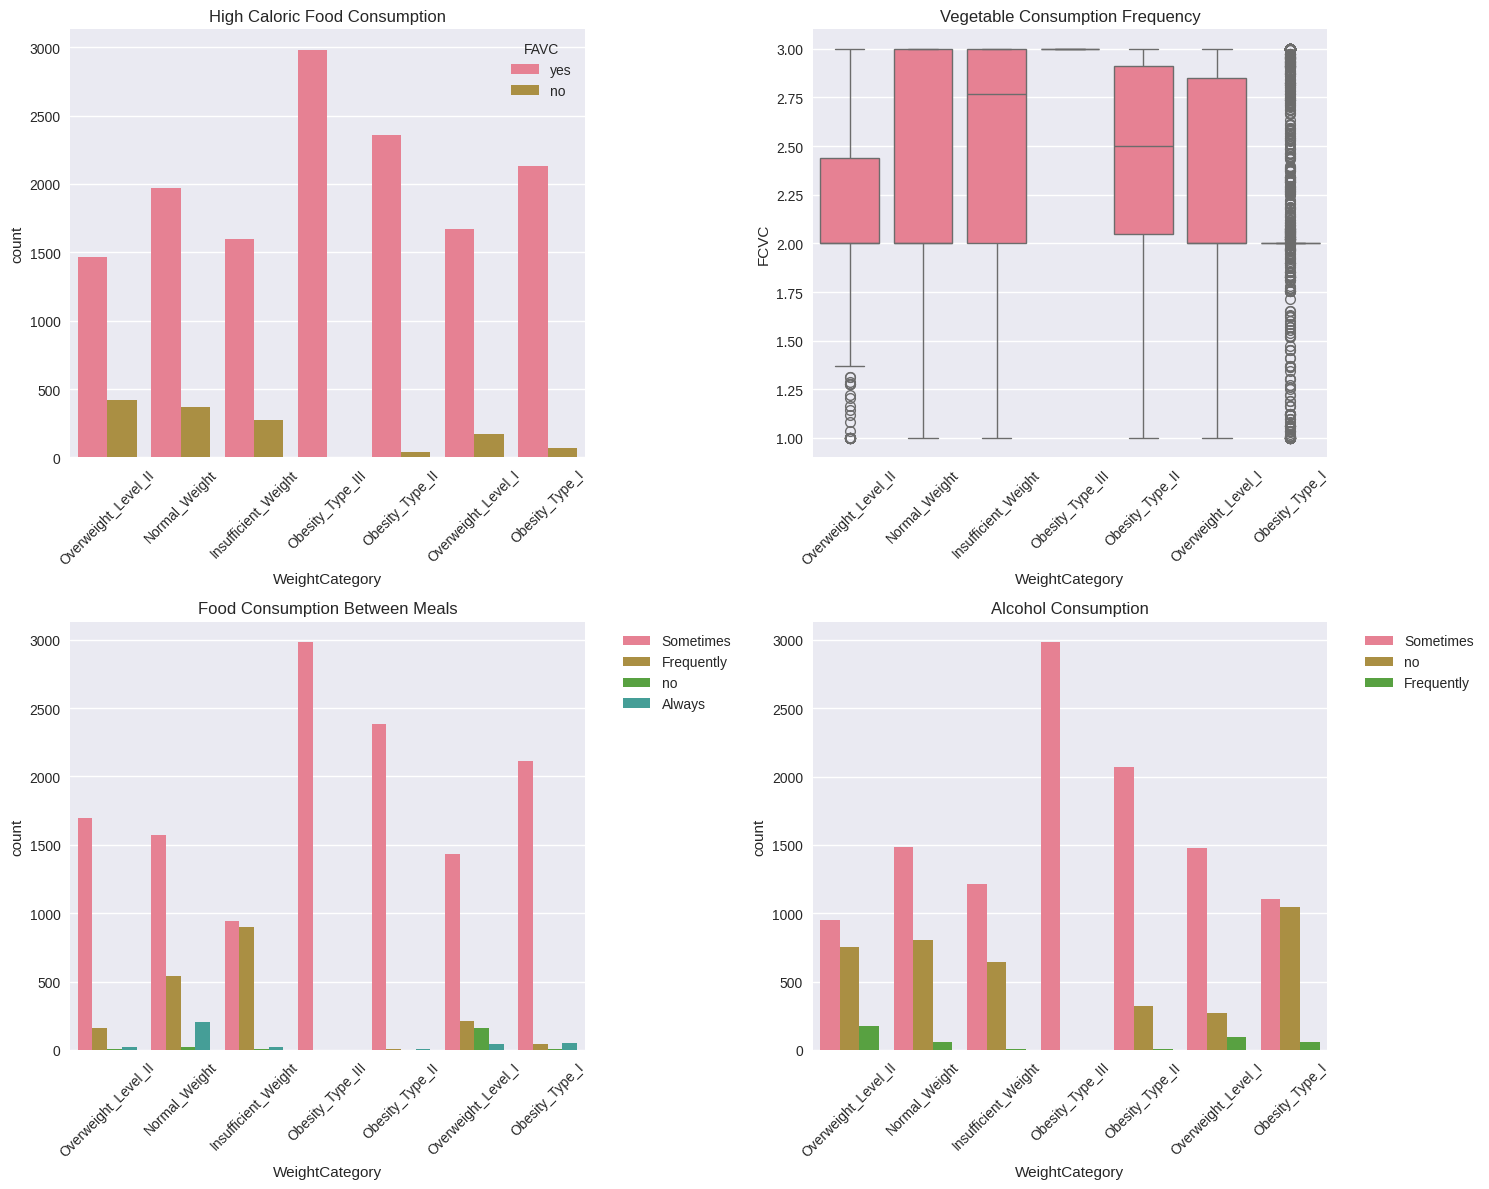

In [28]:
# Eating Habits Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# High caloric food consumption
sns.countplot(data=df, x='WeightCategory', hue='FAVC', ax=axes[0,0])
axes[0,0].set_title('High Caloric Food Consumption')
axes[0,0].tick_params(axis='x', rotation=45)

# Vegetable consumption frequency
sns.boxplot(data=df, x='WeightCategory', y='FCVC', ax=axes[0,1])
axes[0,1].set_title('Vegetable Consumption Frequency')
axes[0,1].tick_params(axis='x', rotation=45)

# Food consumption between meals
sns.countplot(data=df, x='WeightCategory', hue='CAEC', ax=axes[1,0])
axes[1,0].set_title('Food Consumption Between Meals')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Alcohol consumption
sns.countplot(data=df, x='WeightCategory', hue='CALC', ax=axes[1,1])
axes[1,1].set_title('Alcohol Consumption')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

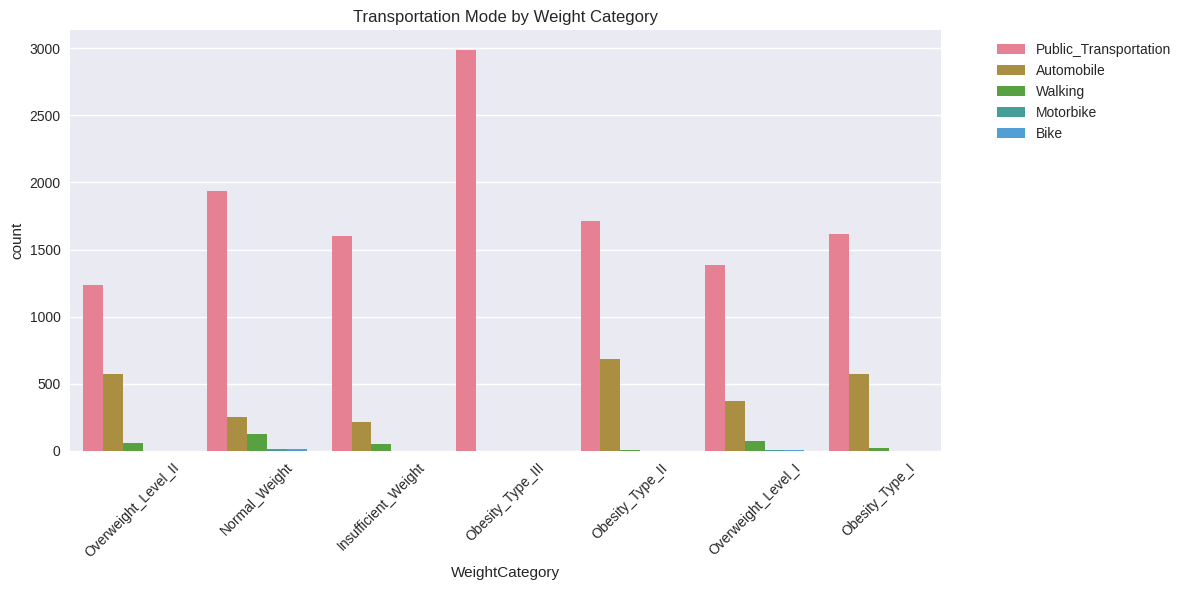

In [29]:
# Transportation Mode Analysis
plt.figure(figsize=(12, 6))
transport_counts = df['MTRANS'].value_counts()
sns.countplot(data=df, x='WeightCategory', hue='MTRANS')
plt.title('Transportation Mode by Weight Category')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

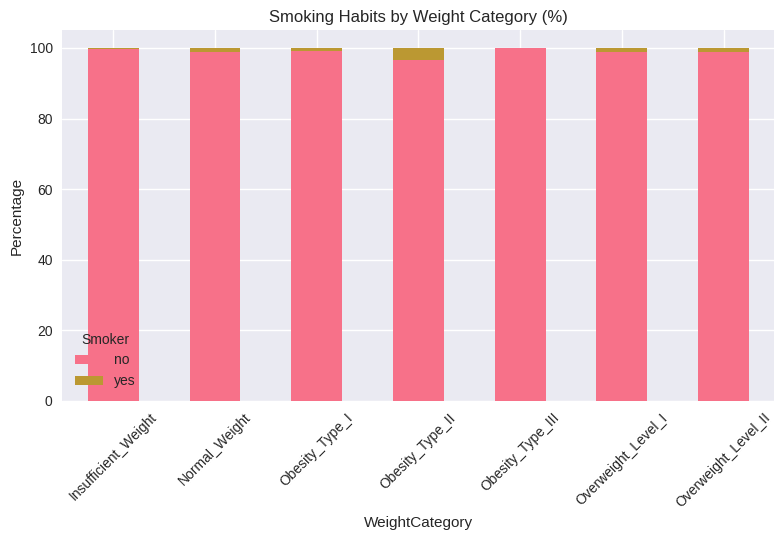

Smoking Habits by Weight Category (%):
SMOKE                       no       yes
WeightCategory                          
Insufficient_Weight  99.732620  0.267380
Normal_Weight        98.848614  1.151386
Obesity_Type_I       99.048482  0.951518
Obesity_Type_II      96.504370  3.495630
Obesity_Type_III     99.932953  0.067047
Overweight_Level_I   98.969631  1.030369
Overweight_Level_II  98.989899  1.010101


In [30]:
# Smoking Habits
plt.figure(figsize=(10, 6))
smoking_impact = pd.crosstab(df['WeightCategory'], df['SMOKE'], normalize='index') * 100
smoking_impact.plot(kind='bar', stacked=True)
plt.title('Smoking Habits by Weight Category (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Smoker')
plt.tight_layout()
plt.show()

print("Smoking Habits by Weight Category (%):")
print(smoking_impact)

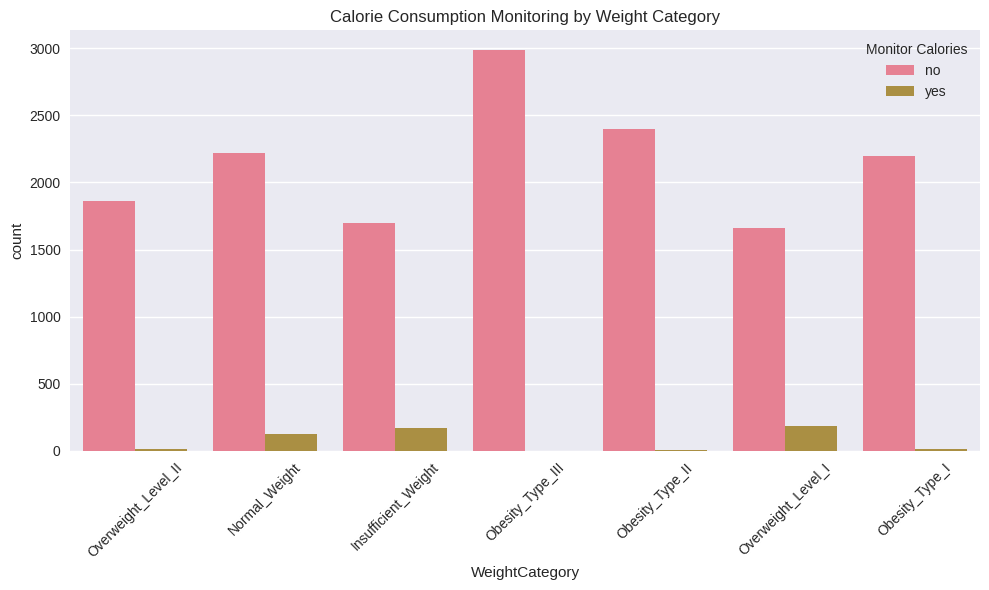

Calorie Monitoring Rates by Weight Category (%):
SCC                          no       yes
WeightCategory                           
Insufficient_Weight   90.962567  9.037433
Normal_Weight         94.541578  5.458422
Obesity_Type_I        99.410965  0.589035
Obesity_Type_II       99.833541  0.166459
Obesity_Type_III     100.000000  0.000000
Overweight_Level_I    90.075922  9.924078
Overweight_Level_II   99.096225  0.903775


In [31]:
# Monitoring Calorie Consumption
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='WeightCategory', hue='SCC')
plt.title('Calorie Consumption Monitoring by Weight Category')
plt.xticks(rotation=45)
plt.legend(title='Monitor Calories')
plt.tight_layout()
plt.show()

# Calculate monitoring rates
monitoring_rates = pd.crosstab(df['WeightCategory'], df['SCC'], normalize='index') * 100
print("Calorie Monitoring Rates by Weight Category (%):")
print(monitoring_rates)

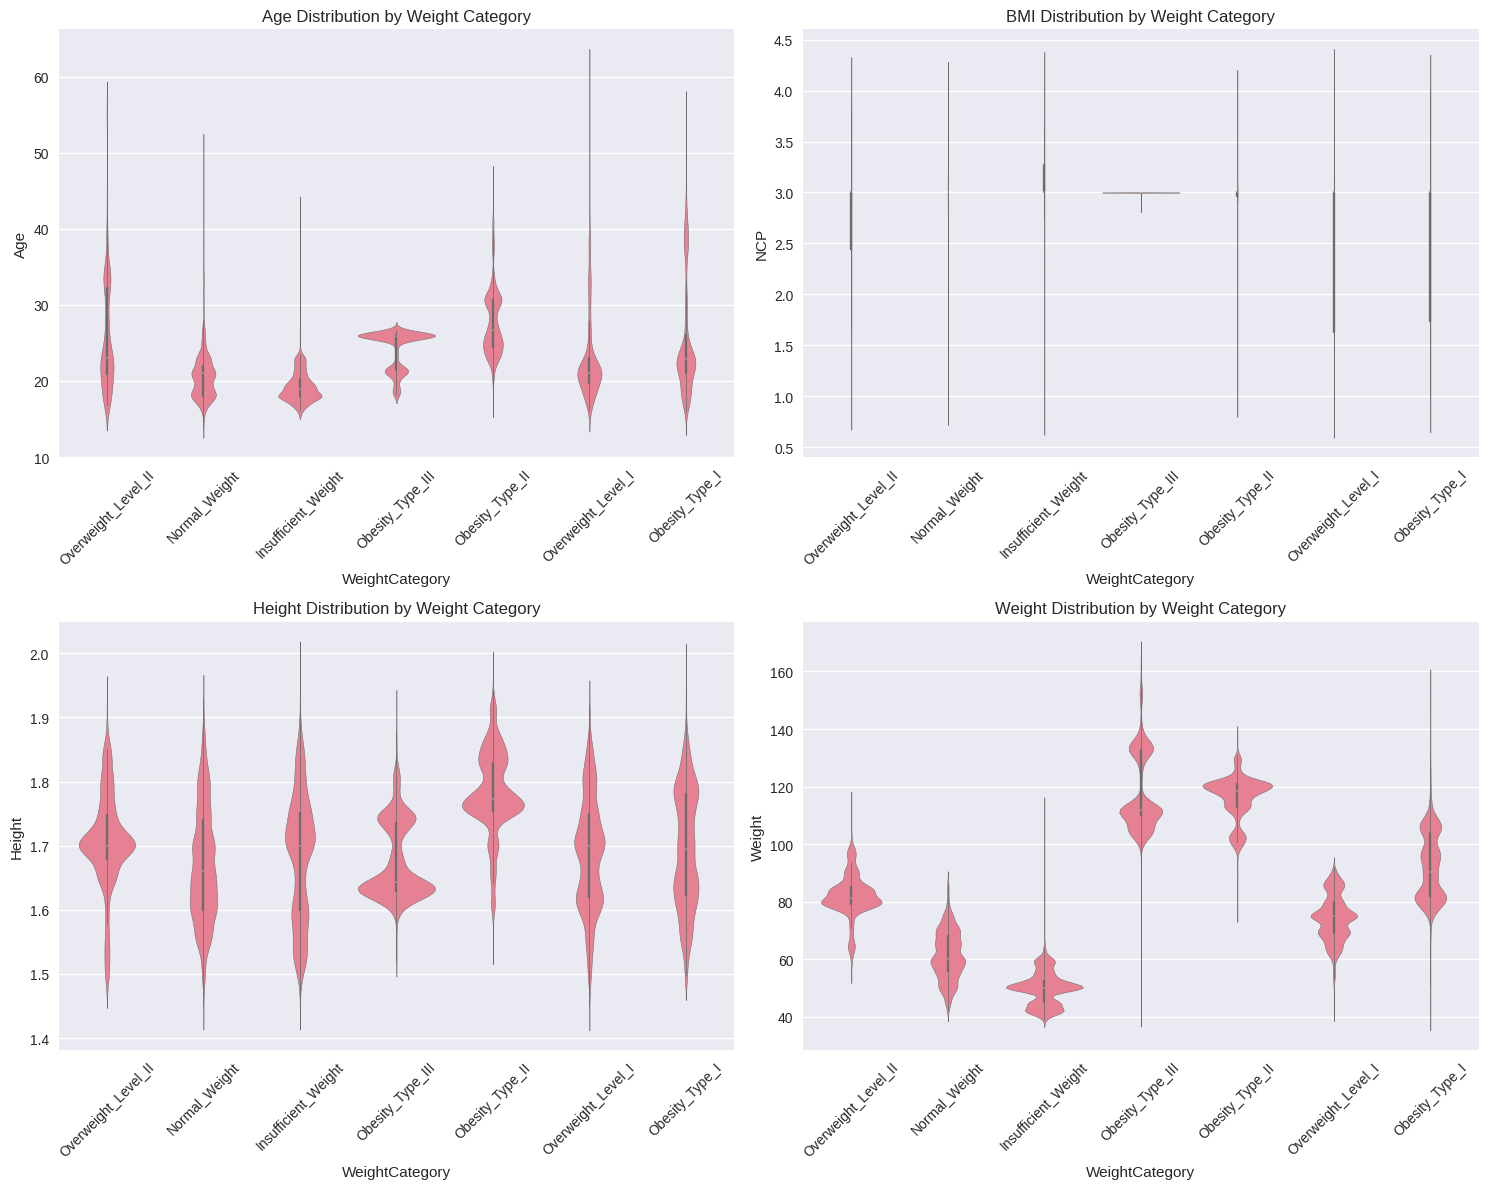

In [32]:
# Violin Plots for Detailed Distribution Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Age distribution
sns.violinplot(data=df, x='WeightCategory', y='Age', ax=axes[0,0])
axes[0,0].set_title('Age Distribution by Weight Category')
axes[0,0].tick_params(axis='x', rotation=45)

# NCP distribution
sns.violinplot(data=df, x='WeightCategory', y='NCP', ax=axes[0,1])
axes[0,1].set_title('NCP Distribution by Weight Category')
axes[0,1].tick_params(axis='x', rotation=45)

# Height distribution
sns.violinplot(data=df, x='WeightCategory', y='Height', ax=axes[1,0])
axes[1,0].set_title('Height Distribution by Weight Category')
axes[1,0].tick_params(axis='x', rotation=45)

# Weight distribution
sns.violinplot(data=df, x='WeightCategory', y='Weight', ax=axes[1,1])
axes[1,1].set_title('Weight Distribution by Weight Category')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

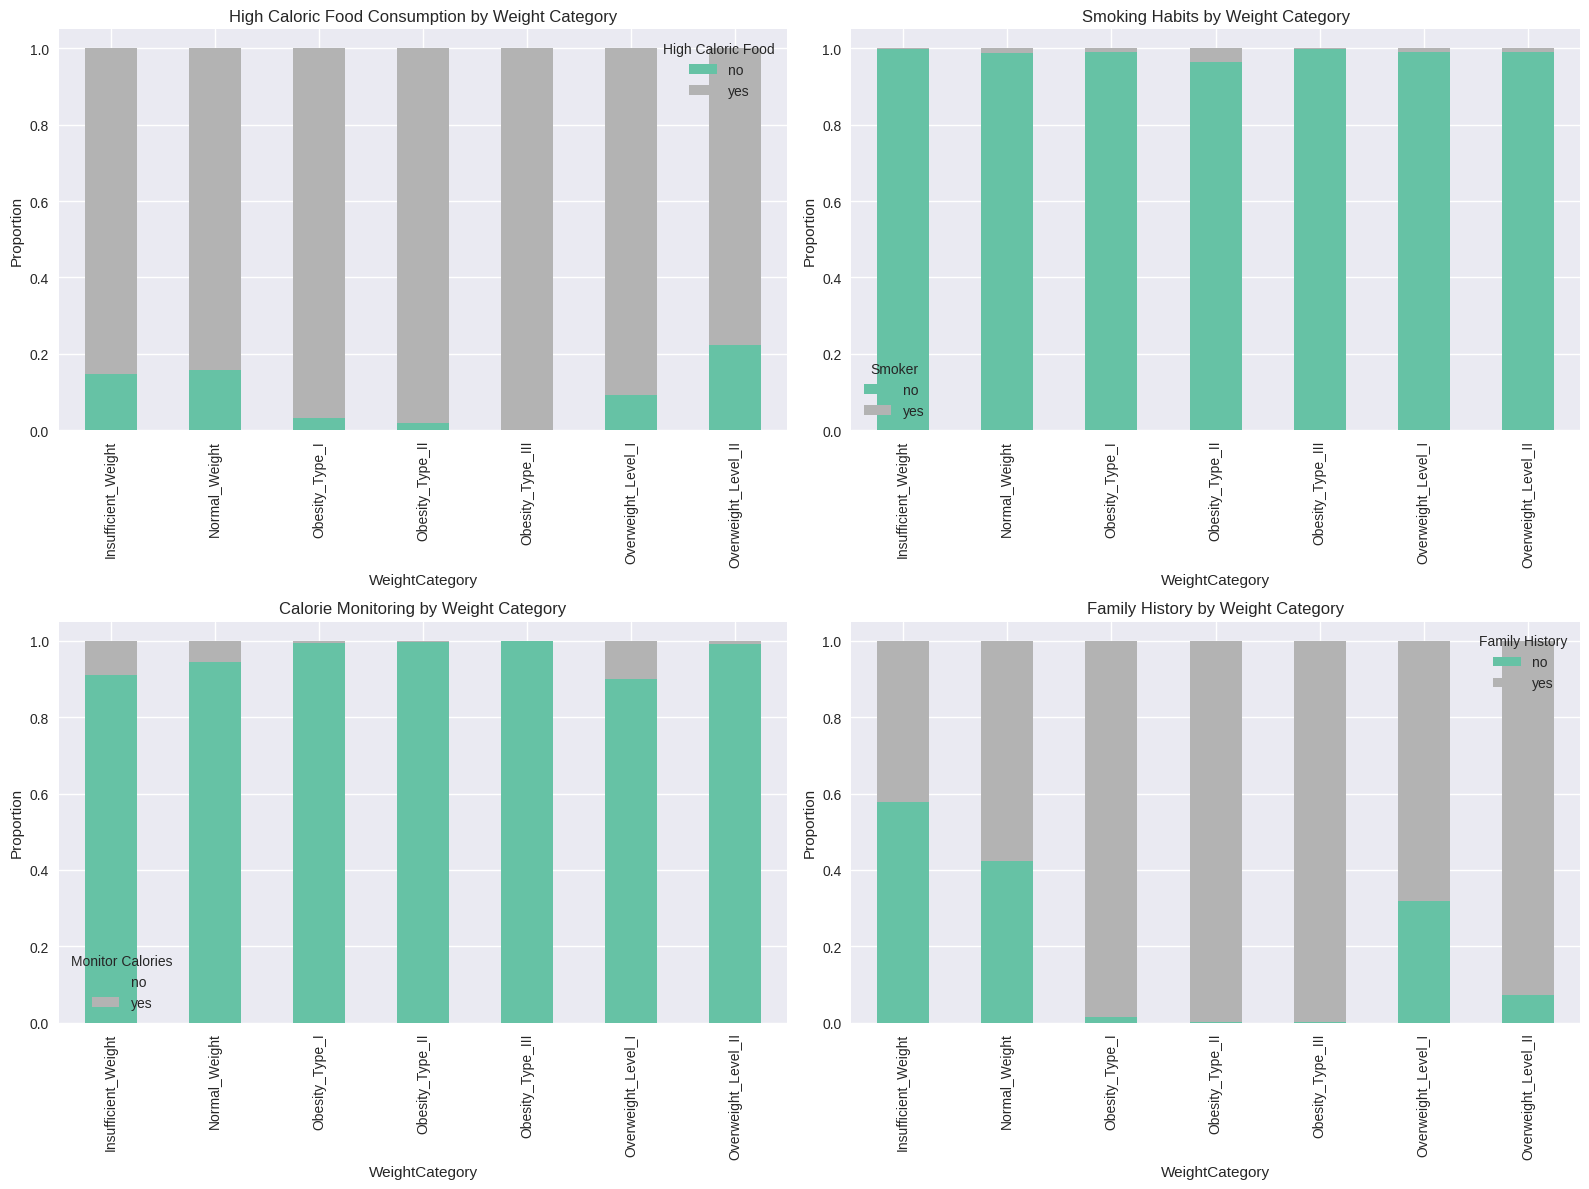

In [33]:
# Stacked Bar Charts for Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# FAVC (High caloric food) by weight category
favc_pivot = pd.crosstab(df['WeightCategory'], df['FAVC'], normalize='index')
favc_pivot.plot(kind='bar', stacked=True, ax=axes[0,0], colormap='Set2')
axes[0,0].set_title('High Caloric Food Consumption by Weight Category')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(title='High Caloric Food')

# SMOKE by weight category
smoke_pivot = pd.crosstab(df['WeightCategory'], df['SMOKE'], normalize='index')
smoke_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], colormap='Set2')
axes[0,1].set_title('Smoking Habits by Weight Category')
axes[0,1].set_ylabel('Proportion')
axes[0,1].legend(title='Smoker')

# SCC (Calorie monitoring) by weight category
scc_pivot = pd.crosstab(df['WeightCategory'], df['SCC'], normalize='index')
scc_pivot.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='Set2')
axes[1,0].set_title('Calorie Monitoring by Weight Category')
axes[1,0].set_ylabel('Proportion')
axes[1,0].legend(title='Monitor Calories')

# Family history by weight category
family_pivot = pd.crosstab(df['WeightCategory'], df['family_history_with_overweight'], normalize='index')
family_pivot.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Set2')
axes[1,1].set_title('Family History by Weight Category')
axes[1,1].set_ylabel('Proportion')
axes[1,1].legend(title='Family History')

plt.tight_layout()
plt.show()

/tmp/ipython-input-625452034.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x=var, ax=axes[i], label=category, fill=True, alpha=0.5)


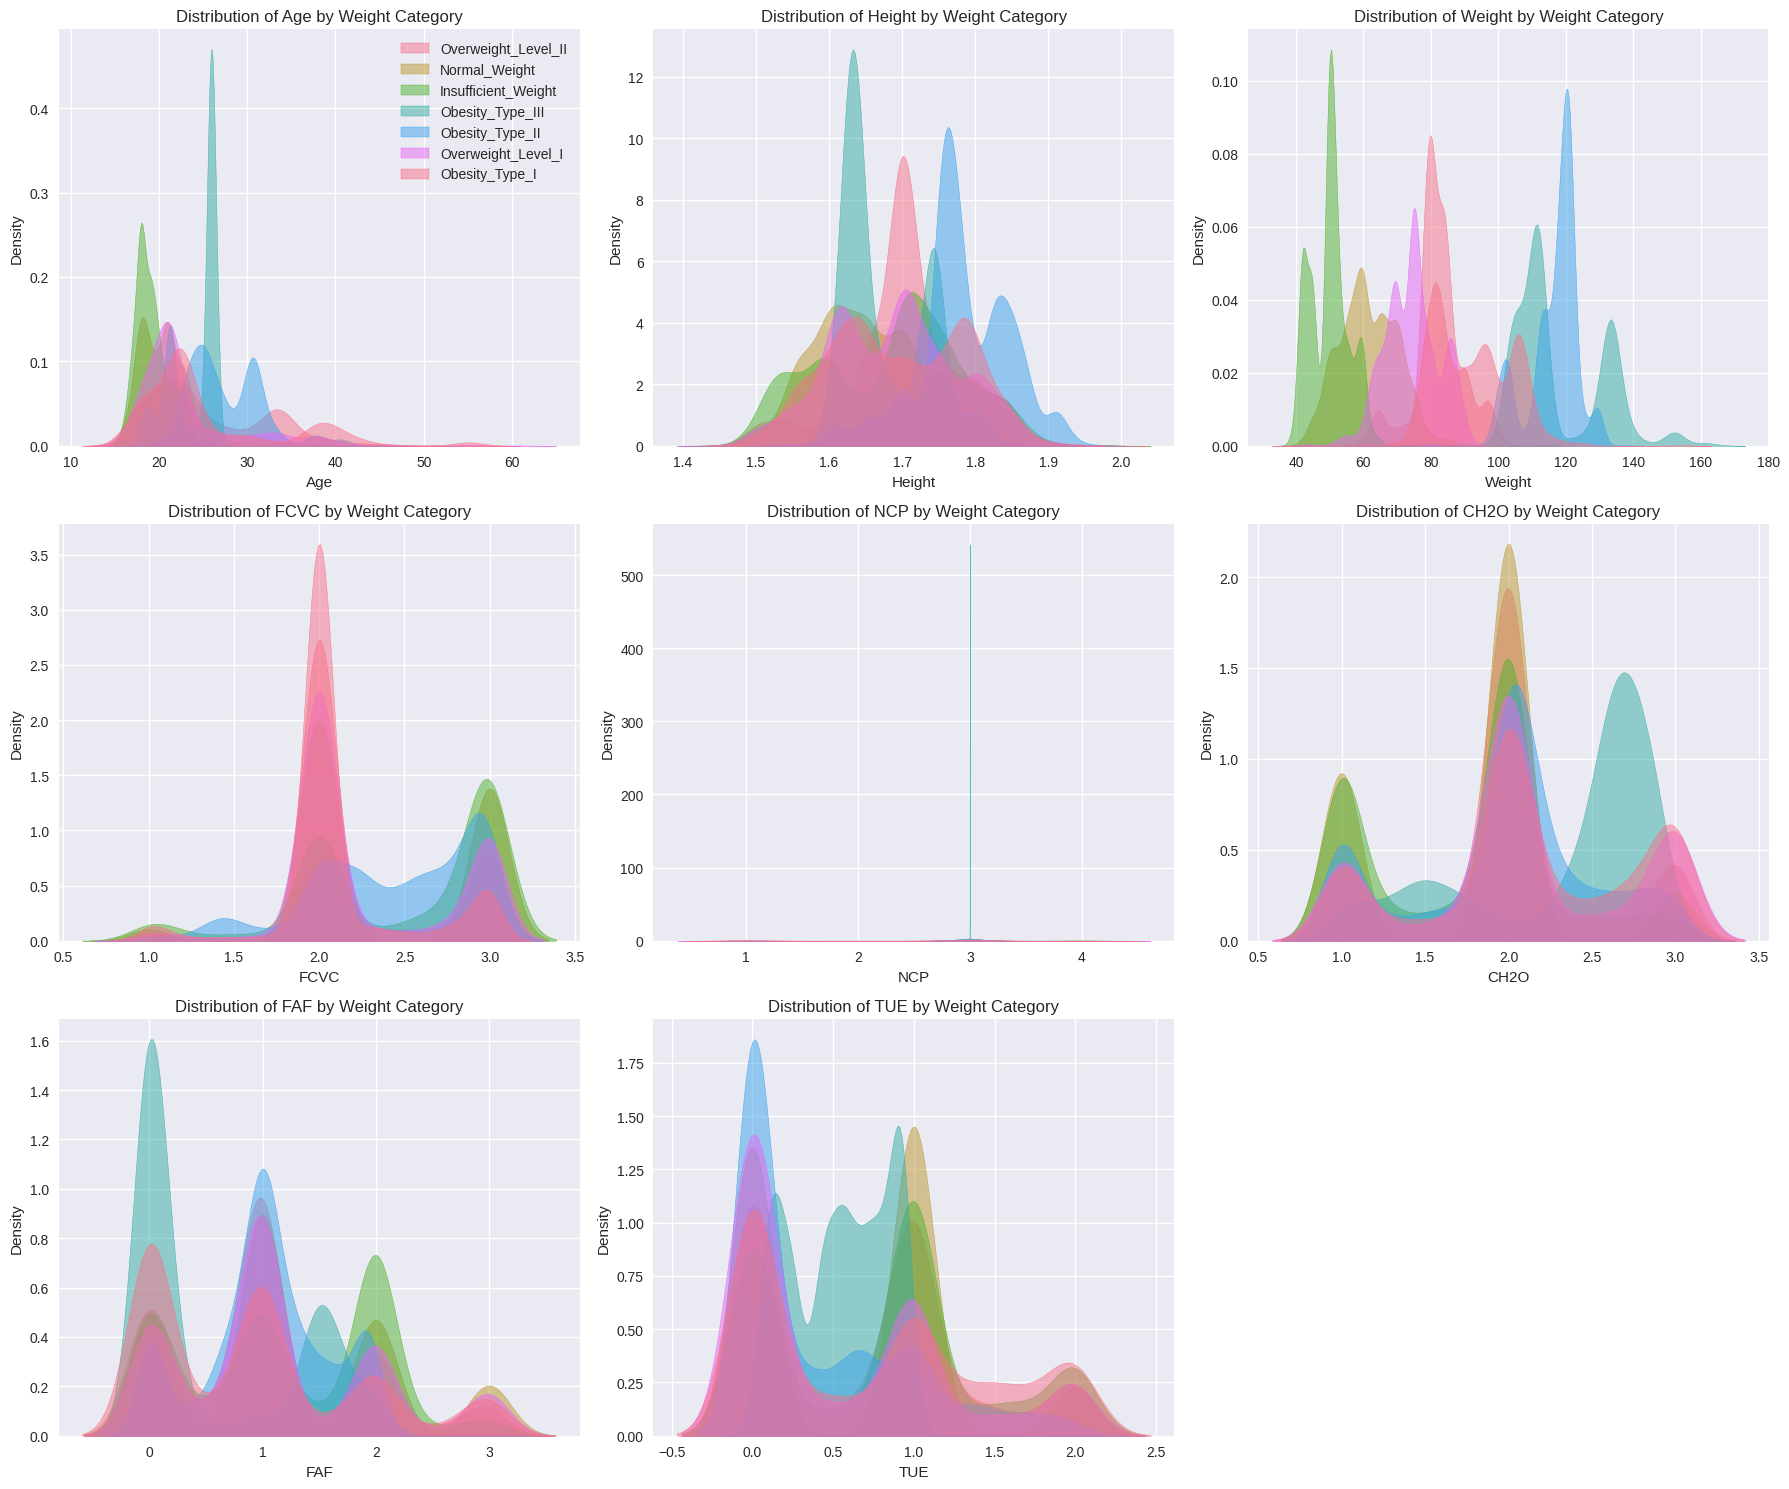

In [34]:
# Distribution of Continuous Variables with KDE Plots
continuous_vars = ['Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF', 'TUE','Age', ]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    for category in df['WeightCategory'].unique():
        subset = df[df['WeightCategory'] == category]
        sns.kdeplot(data=subset, x=var, ax=axes[i], label=category, fill=True, alpha=0.5)
    axes[i].set_title(f'Distribution of {var} by Weight Category')
    axes[i].set_xlabel(var)
    if i == 0:
        axes[i].legend()

# Remove empty subplots
for i in range(len(continuous_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

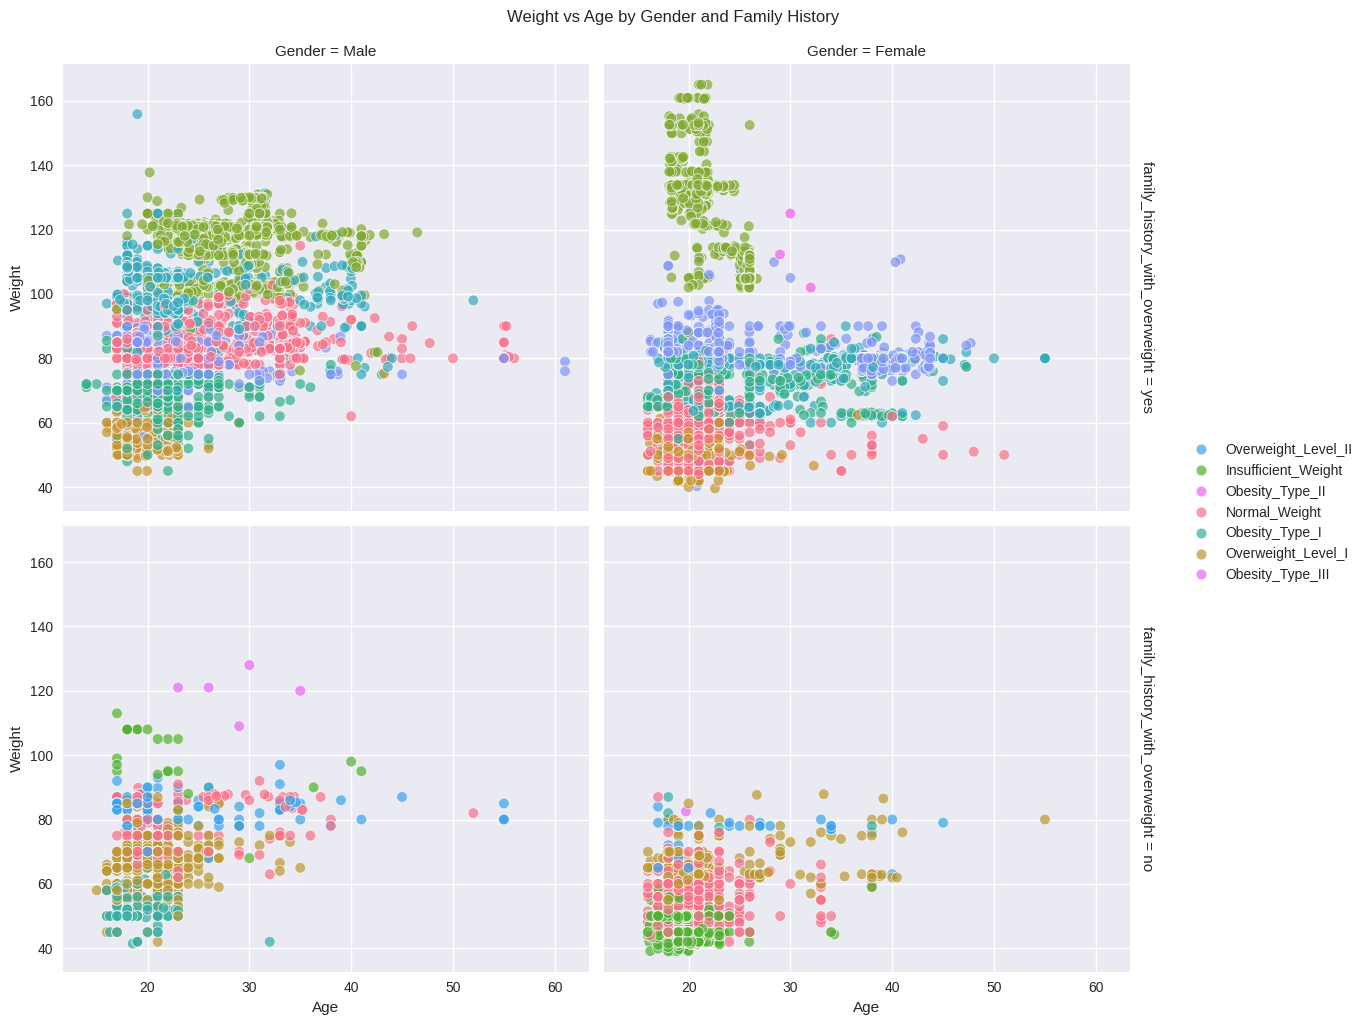

In [35]:
# Interactive-style Plot: Facet Grid by Gender and Family History
g = sns.FacetGrid(df, col='Gender', row='family_history_with_overweight',
                  height=5, aspect=1.2, margin_titles=True)
g.map_dataframe(sns.scatterplot, x='Age', y='Weight', hue='WeightCategory',
                alpha=0.7, s=60)
g.add_legend()
plt.suptitle('Weight vs Age by Gender and Family History', y=1.02)
plt.show()

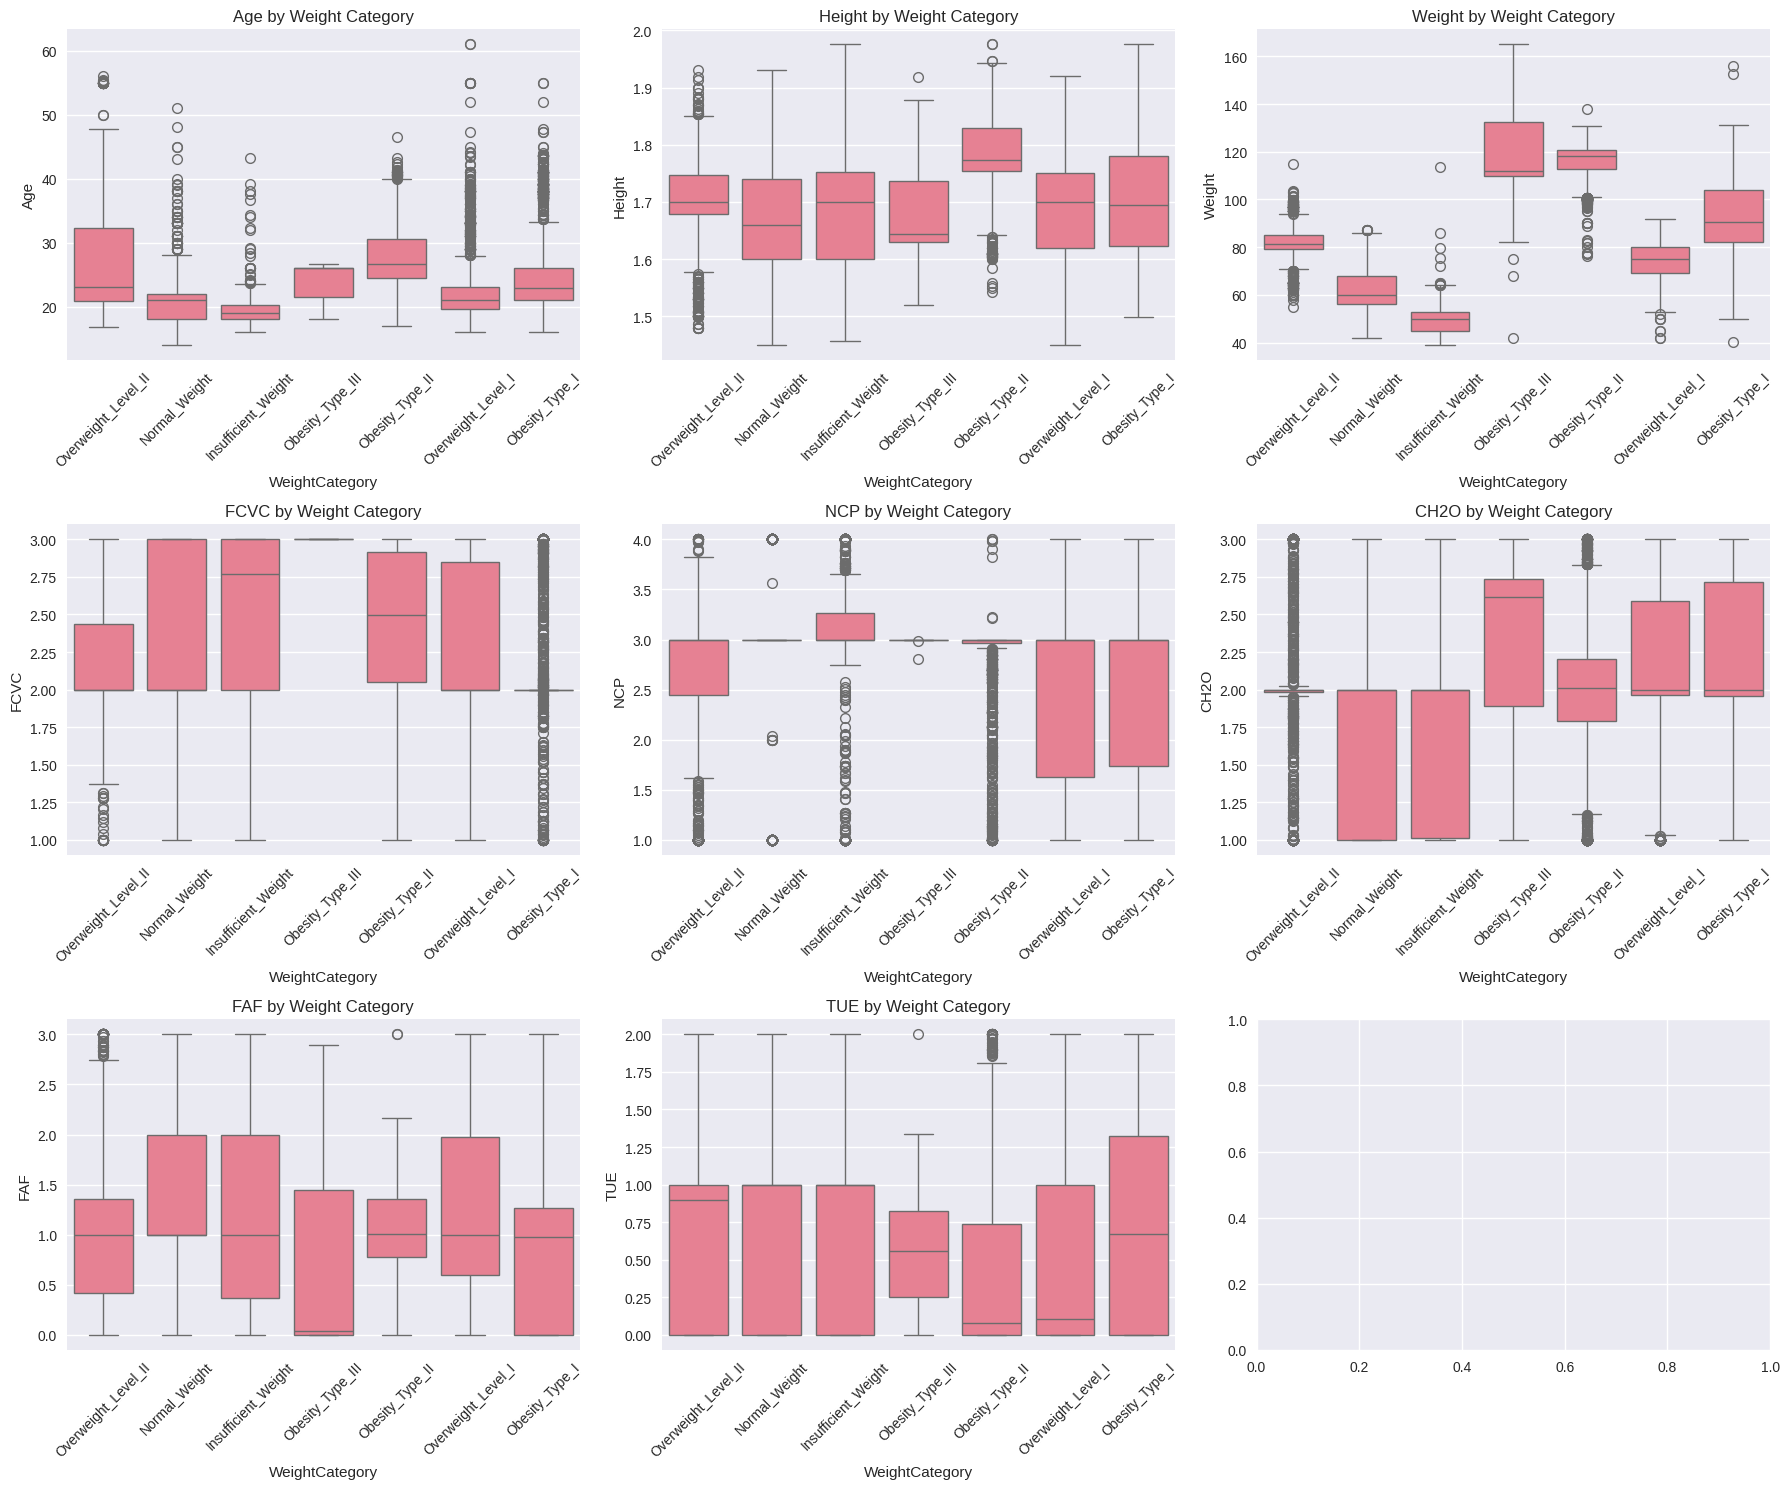

In [36]:
# Box Plots for All Numerical Features by Weight Category
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.boxplot(data=df, x='WeightCategory', y=feature, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Weight Category')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

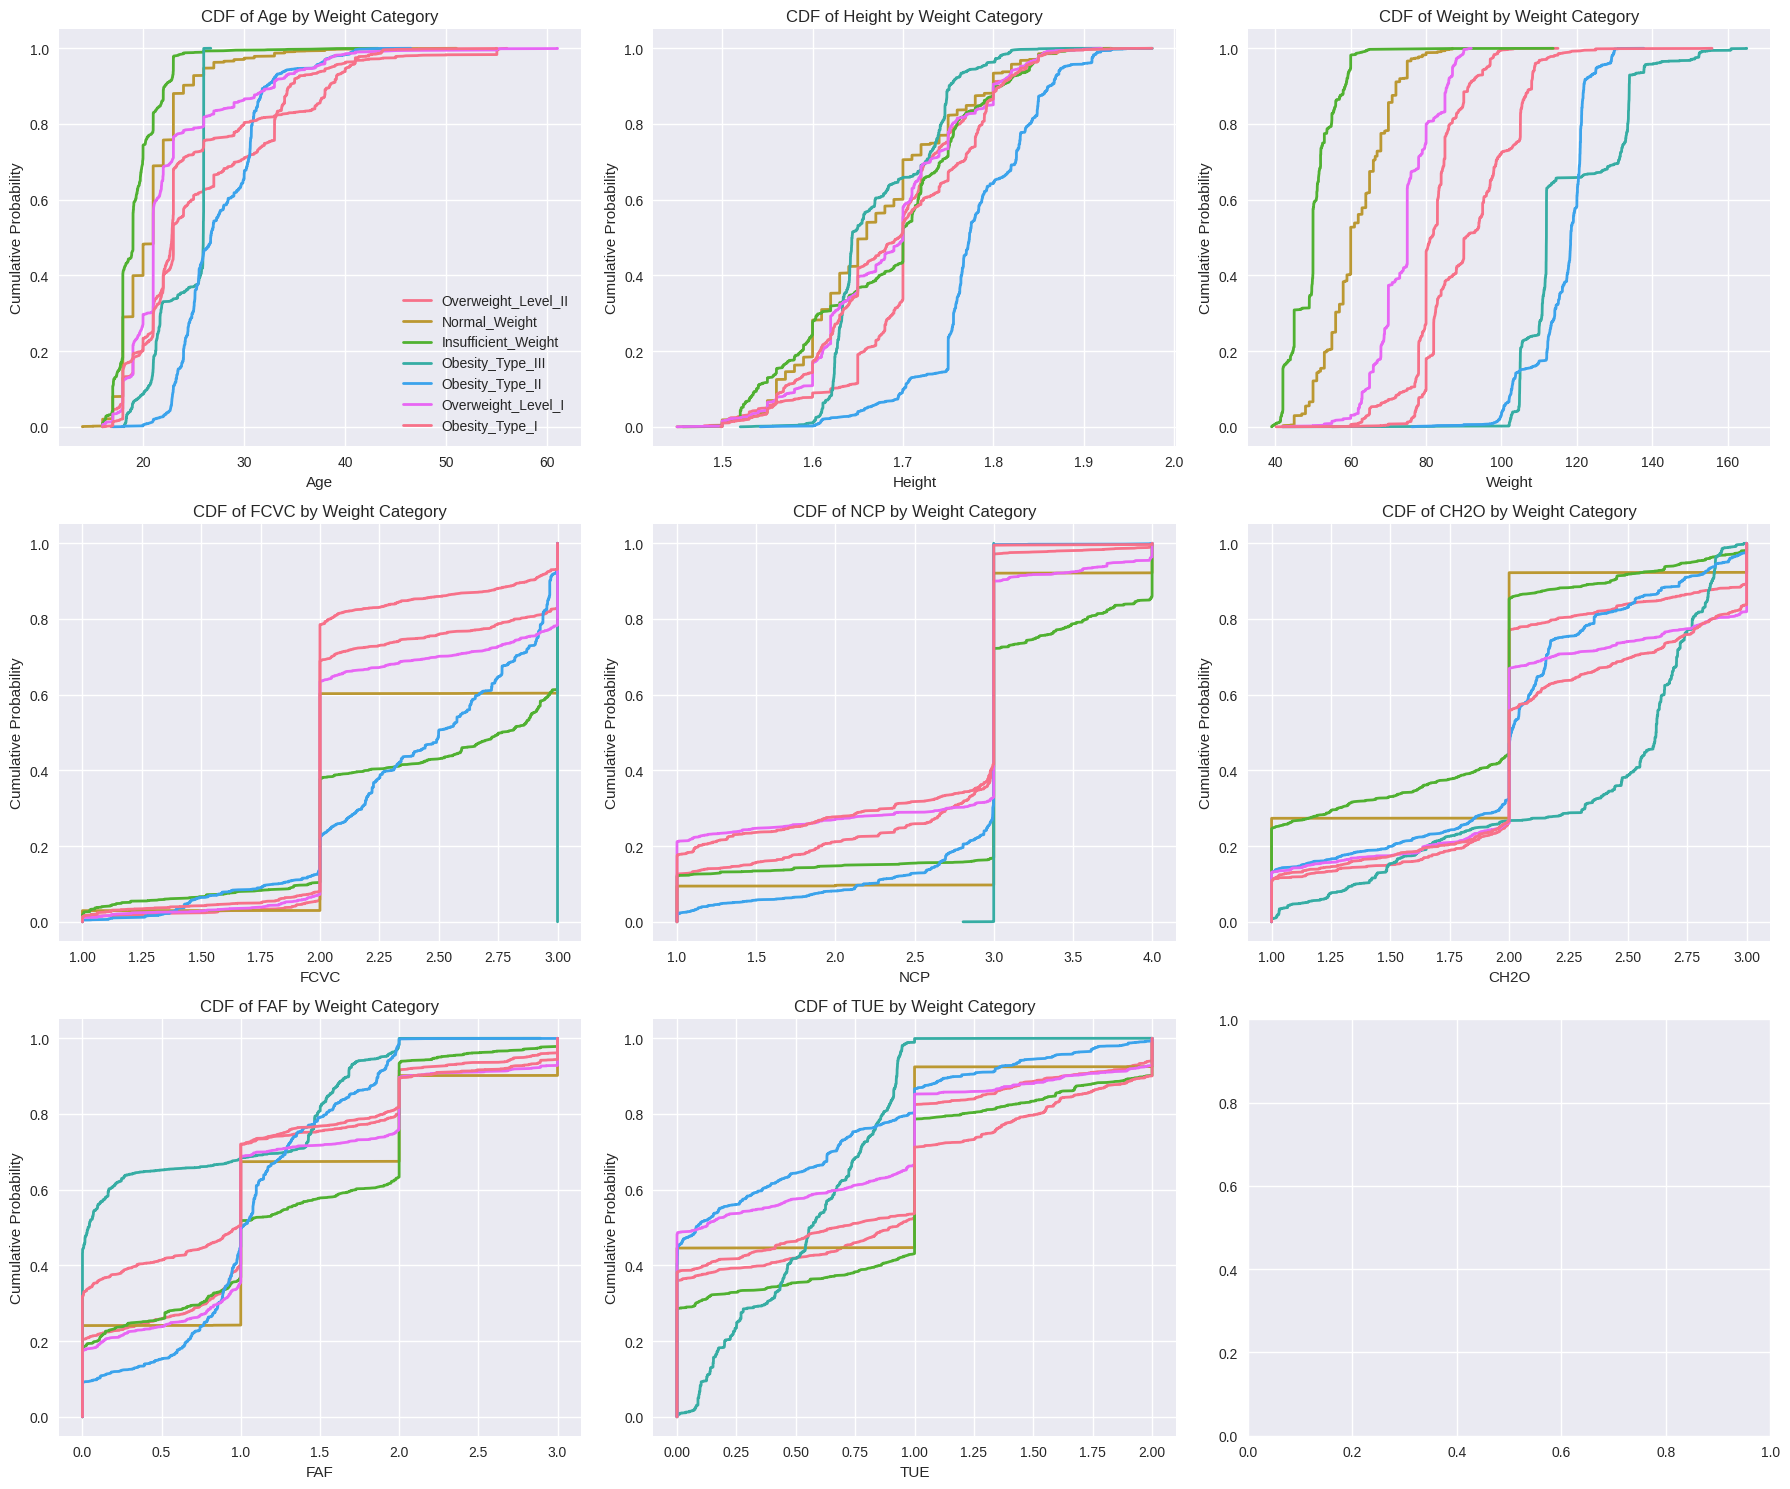

In [35]:
# Cumulative Distribution Functions (CDF) by Weight Category
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
key_numerical = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for i, feature in enumerate(key_numerical):
    row, col = i // 3, i % 3
    for category in df['WeightCategory'].unique():
        subset = df[df['WeightCategory'] == category][feature]
        sorted_data = np.sort(subset)
        yvals = np.arange(len(sorted_data)) / float(len(sorted_data))
        axes[row, col].plot(sorted_data, yvals, label=category, linewidth=2)

    axes[row, col].set_title(f'CDF of {feature} by Weight Category')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Cumulative Probability')
    if i == 0:
        axes[row, col].legend()

plt.tight_layout()
plt.show()

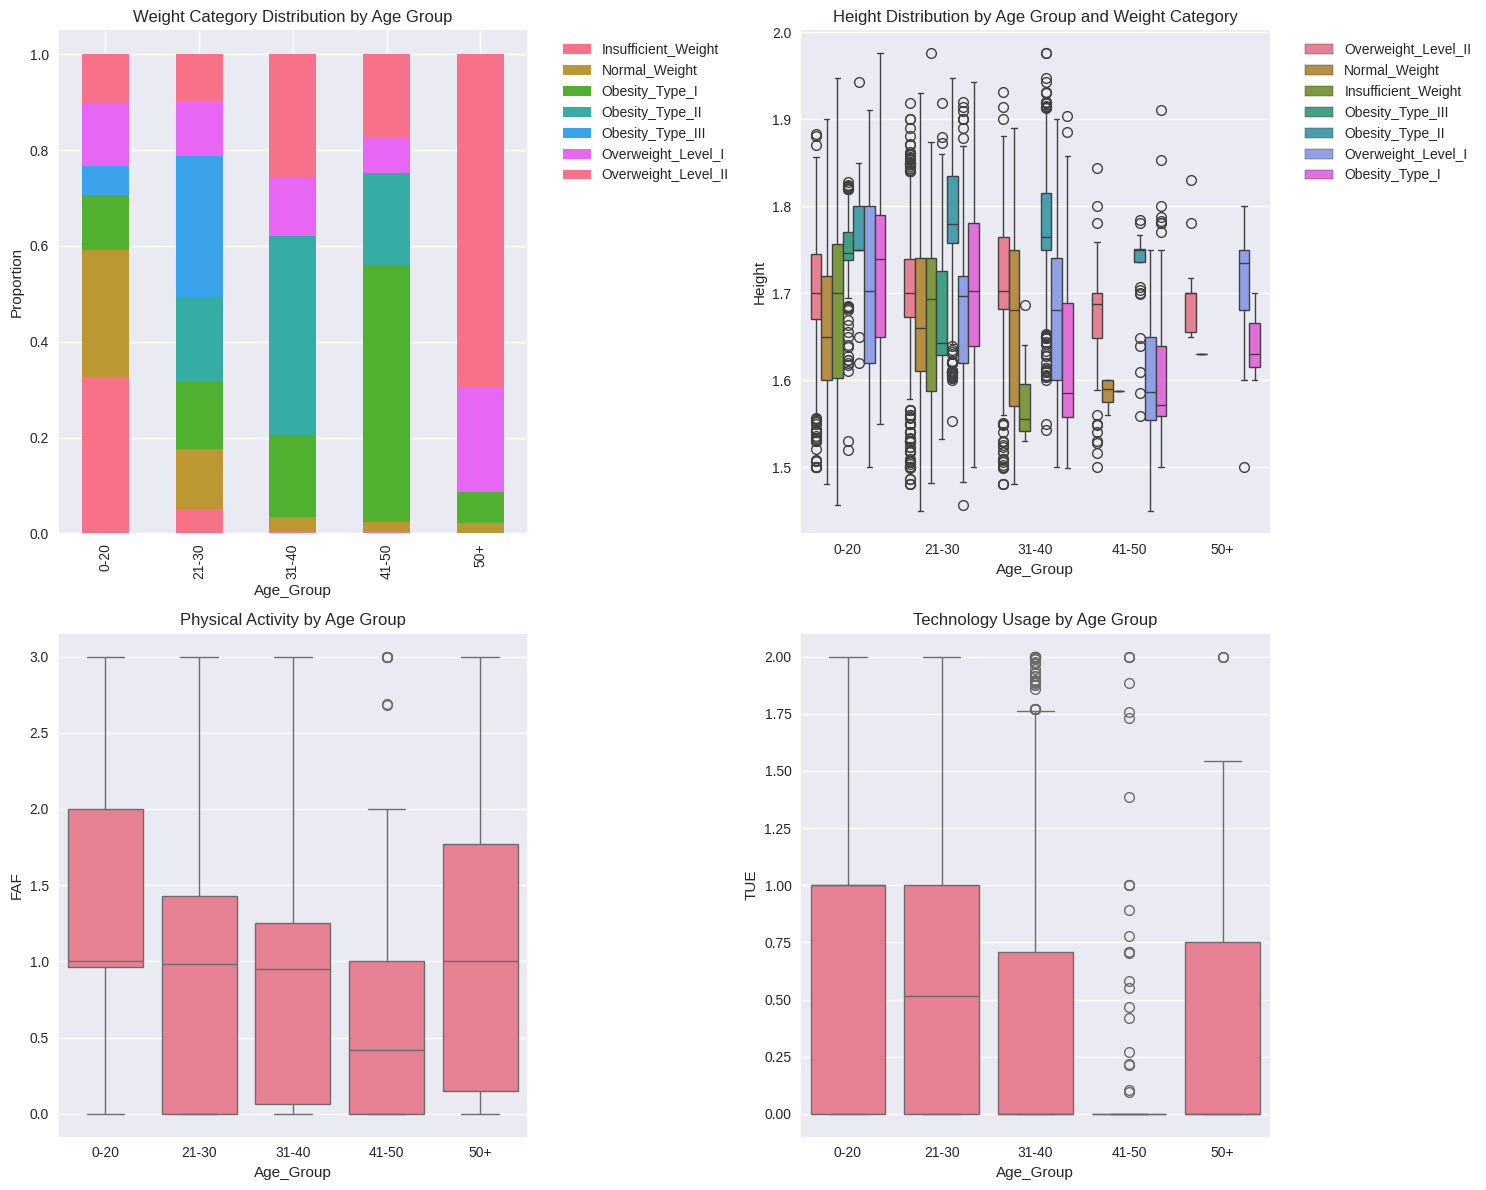

In [36]:
# Age group Analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100],
                        labels=['0-20', '21-30', '31-40', '41-50', '50+'])

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Weight category distribution by age group
age_group_dist = pd.crosstab(df['Age_Group'], df['WeightCategory'], normalize='index')
age_group_dist.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Weight Category Distribution by Age Group')
axes[0,0].set_ylabel('Proportion')
axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Average Height by age group and weight category
sns.boxplot(data=df, x='Age_Group', y='Height', hue='WeightCategory', ax=axes[0,1])
axes[0,1].set_title('Height Distribution by Age Group and Weight Category')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Physical activity by age group
sns.boxplot(data=df, x='Age_Group', y='FAF', ax=axes[1,0])
axes[1,0].set_title('Physical Activity by Age Group')

# Technology usage by age group
sns.boxplot(data=df, x='Age_Group', y='TUE', ax=axes[1,1])
axes[1,1].set_title('Technology Usage by Age Group')

plt.tight_layout()
plt.show()

### Model Training

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Import Optuna for hyperparameter optimization
import optuna

In [40]:
# === Load data ===
train = pd.read_csv("dataset/train.csv")
test  = pd.read_csv("dataset/test.csv")

In [41]:
# Store test IDs if available
test_ids = test['id'] if 'id' in test.columns else None

# Prepare features and target for training
X = train.drop(['id','WeightCategory'], axis=1)
y = train['WeightCategory']

# Prepare test data
X_test = test.drop(['id'], axis=1)

In [42]:
# Function to detect and handle outliers based on correlation and percentage threshold
def handle_outliers_based_on_correlation(X, y, correlation_threshold=0.1, outlier_threshold=0.03):
    """
    Detect outliers and handle them based on correlation with target and outlier percentage
    - If outliers > 3% AND correlation > threshold: replace outliers with median
    - If outliers > 3% AND correlation < threshold: drop the column
    - If outliers <= 3%: keep as is (minor outliers)
    """
    from sklearn.preprocessing import LabelEncoder

    # Encode target for correlation calculation
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Select only numerical columns for outlier detection
    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

    # Remove ID column if present
    if 'id' in numerical_cols:
        numerical_cols.remove('id')

    print(f"\nChecking {len(numerical_cols)} numerical columns for outliers (threshold: {outlier_threshold*100}%)...")

    X_processed = X.copy()
    columns_to_drop = []
    columns_modified = []

    for col in numerical_cols:
        # Calculate correlation with target
        correlation = np.corrcoef(X[col], y_encoded)[0, 1]
        abs_correlation = abs(correlation)

        # Detect outliers using IQR method
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((X[col] < lower_bound) | (X[col] > upper_bound))
        outlier_count = outliers.sum()
        outlier_percentage = outlier_count / len(X)

        if outlier_percentage > outlier_threshold:
            # More than 3% outliers - take action
            if abs_correlation >= correlation_threshold:
                # High correlation: replace outliers with median
                median_val = X[col].median()
                X_processed.loc[outliers, col] = median_val
                columns_modified.append(col)
                print(f"  {col}: {outlier_count} outliers ({outlier_percentage:.1%}) REPLACED (corr: {correlation:.3f})")
            else:
                # Low correlation: mark for dropping
                columns_to_drop.append(col)
                print(f"  {col}: {outlier_count} outliers ({outlier_percentage:.1%}) DROPPED (corr: {correlation:.3f})")
        else:
            # 3% or fewer outliers - keep as is
            if outlier_count > 0:
                print(f"  {col}: {outlier_count} outliers ({outlier_percentage:.1%}) KEPT (corr: {correlation:.3f})")
            else:
                print(f"  {col}: No outliers (corr: {correlation:.3f})")

    # Drop low correlation columns with significant outliers
    if columns_to_drop:
        X_processed = X_processed.drop(columns=columns_to_drop)
        print(f"\nDropped {len(columns_to_drop)} columns with low correlation and >{outlier_threshold*100}% outliers: {columns_to_drop}")

    if columns_modified:
        print(f"Modified {len(columns_modified)} columns with high correlation and >{outlier_threshold*100}% outliers: {columns_modified}")

    return X_processed

# Apply outlier handling with 3% threshold
print("\n" + "="*60)
print("OUTLIER DETECTION AND HANDLING (>3% THRESHOLD)")
print("="*60)
X_processed = handle_outliers_based_on_correlation(X, y, correlation_threshold=0.1, outlier_threshold=0.03)
X_test_processed = X_test[X_processed.columns]  # Keep same columns as training



OUTLIER DETECTION AND HANDLING (>3% THRESHOLD)

Checking 8 numerical columns for outliers (threshold: 3.0%)...
  Age: 792 outliers (5.1%) REPLACED (corr: 0.276)
  Height: 4 outliers (0.0%) KEPT (corr: 0.064)
  Weight: No outliers (corr: 0.430)
  FCVC: No outliers (corr: 0.041)
  NCP: 4548 outliers (29.3%) DROPPED (corr: -0.092)
  CH2O: No outliers (corr: 0.188)
  FAF: No outliers (corr: -0.098)
  TUE: No outliers (corr: -0.080)

Dropped 1 columns with low correlation and >3.0% outliers: ['NCP']
Modified 1 columns with high correlation and >3.0% outliers: ['Age']


In [43]:
# === One-hot encode categorical features (drop_first like your reference) ===
X = pd.get_dummiesX, drop_first=True)
X_test  = pd.get_dummies(X_test,  drop_first=True)

In [44]:
# === Align columns: ensures test has same columns as train ===
X_test = X_test.reindex(columns=X.columns, fill_value=0)

In [45]:
# === Scale numeric features (fit on train, apply to both) ===
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_test_s  = scaler.transform(X_test)

In [46]:
# === Encode target labels ===
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [47]:
X_temp, X_val, y_temp, y_val = train_test_split(
    X_s, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
          "KNeighborsClassifier": KNeighborsClassifier(),
          "DecisionTreeClassifier" : DecisionTreeClassifier(),
          "RandomForestClassifier" : RandomForestClassifier(),
          "XGBClassifier" : XGBClassifier(eval_metric='logloss')
         }

In [49]:
import sklearn.metrics as metrics

def gen_score(actual, predicted):

    score =100*(metrics.accuracy_score(actual, predicted))

    return score

In [50]:
## Training

from datetime import datetime

results = dict()

for model in models.keys():

    start = datetime.now()

    md = models[model].fit(X_temp,y_temp)
    pred = md.predict(X_val)
    score = gen_score(y_val,pred)

    end = datetime.now()

    print("Model: " + model + " Score: "  ,  score, "\n" )

    results[model] = score

Model: KNeighborsClassifier Score:  72.51367878982941 

Model: DecisionTreeClassifier Score:  83.81074991953653 

Model: RandomForestClassifier Score:  88.96041197296427 

Model: XGBClassifier Score:  90.34438364982297 



In [23]:
## Best model found - XGBClassifier

In [51]:
param_search = {
    'colsample_bytree': np.linspace(0.1, 1.0, 5),       # 5 evenly spaced values
    'gamma': np.linspace(0.0, 1.0, 5),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [3, 5, 7],
    'n_estimators': [200, 300, 350],
    'reg_alpha': np.linspace(0.5, 1.0, 6),
    'reg_lambda': np.linspace(2.0, 3.0, 6),
    'subsample': np.linspace(0.5, 1.0, 6)
}

In [52]:
xgb = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
)

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Random search setup
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_search,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
random_search.fit(X_temp, y_temp)

# Best parameters and score
print("Best parameters found:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found: {'subsample': np.float64(0.7), 'reg_lambda': np.float64(2.6), 'reg_alpha': np.float64(0.5), 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': np.float64(1.0), 'colsample_bytree': np.float64(0.55)}


In [28]:
def objective(trial):
    params = {
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.55, 0.775),
        'gamma': trial.suggest_float('gamma', 0.25, 0.75),
        'learning_rate': trial.suggest_float('learning_rate', 0.1, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 3, 7),
        'n_estimators': trial.suggest_int('n_estimators', 300, 350),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.6, 0.9),
        'reg_lambda': trial.suggest_float('reg_lambda', 2.8, 3.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }

    model = XGBClassifier(**params)
    model.fit(X_temp, y_temp)
    y_pred_opt = model.predict(X_val)
    return accuracy_score(y_val, y_pred_opt)

In [29]:
# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=600)  # Adjust n_trials as needed for computation time

[I 2025-10-26 12:55:23,300] A new study created in memory with name: no-name-fb2b4479-15e4-4819-8981-0517f3e30aa1
[I 2025-10-26 12:55:26,353] Trial 0 finished with value: 0.9108464757000322 and parameters: {'colsample_bytree': 0.6020639479263695, 'gamma': 0.4730246053231879, 'learning_rate': 0.12032078526207379, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 302, 'reg_alpha': 0.833724447300061, 'reg_lambda': 2.873013787437153, 'subsample': 0.7249236441751988}. Best is trial 0 with value: 0.9108464757000322.
[I 2025-10-26 12:55:32,042] Trial 1 finished with value: 0.9050531058899259 and parameters: {'colsample_bytree': 0.7171524689191704, 'gamma': 0.5318730967962501, 'learning_rate': 0.11037323764134566, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 338, 'reg_alpha': 0.6079500489840656, 'reg_lambda': 2.9169106828431386, 'subsample': 0.7798000435971867}. Best is trial 0 with value: 0.9108464757000322.
[I 2025-10-26 12:55:34,720] Trial 2 finished with value: 0.90537495976

In [54]:
# After running for 2500 trials, best parameter found
best_params = {
     'subsample': 0.8,
        'reg_lambda': 2.95,
        'reg_alpha': 0.7,
        'n_estimators': 345,
        'min_child_weight': 5,
        'max_depth': 3,
        'learning_rate': np.float64(0.175),
        'gamma': 0.45,
        'colsample_bytree': 0.6
}

In [55]:
# === Build model with your best params and fixed options ===
xgb = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',
    **best_params
)

In [56]:
print("\n" + "="*60)
print("OVERSAMPLING TECHNIQUES COMPARISON")
print("="*60)

# 1. No Oversampling (Baseline)
print("\n1. Training with NO OVERSAMPLING...")
xgb_baseline = XGBClassifier(objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',**best_params)

xgb_baseline.fit(X_temp, y_temp)
y_pred_baseline = xgb_baseline.predict(X_val)
acc_baseline = accuracy_score(y_val, y_pred_baseline)
print(f"Validation Accuracy: {acc_baseline:.4f}")



# 2. Random Oversampling
print("\n2. Training with RANDOM OVERSAMPLING...")
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_temp, y_temp)
xgb_ros = XGBClassifier(objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',**best_params)

xgb_ros.fit(X_ros, y_ros)
y_pred_ros = xgb_ros.predict(X_val)
acc_ros = accuracy_score(y_val, y_pred_ros)
print(f"Validation Accuracy: {acc_ros:.4f}")


OVERSAMPLING TECHNIQUES COMPARISON

1. Training with NO OVERSAMPLING...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.9041

2. Training with RANDOM OVERSAMPLING...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Accuracy: 0.9015


In [57]:
# Scale full training data, to avoid Data Leaks
scaler_final = StandardScaler()
X_full_scaled = scaler_final.fit_transform(X)
X_test_final_scaled = scaler_final.transform(X_test)

In [58]:
# === Train on full training data ===
# Best model - Baseline model without oversampling in this case
final_model = XGBClassifier(objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    tree_method='hist',**best_params)

print("Training model with best_params...") # In this case, No oversampling
final_model.fit(X_full_scaled, y_enc)

Training model with best_params...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:27:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.45,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=np.float64(0.175),
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=345, n_jobs=-1,
              num_parallel_tree=None, ...)

In [59]:
# Make predictions on test set
print("Making predictions on test set...")
test_predictions_encoded = final_model.predict(X_test_final_scaled)
test_predictions = le.inverse_transform(test_predictions_encoded)

Making predictions on test set...


In [60]:
# # Create submission file
sub = pd.DataFrame()
sub['id'] = test_ids
sub['WeightCategory'] = test_predictions


# Save predictions
sub.to_csv('sub31.csv', index=False)